In [ ]:
import pandas as pd

## Importing Data

In [ ]:
# # df=pd.read_csv('/content/drive/MyDrive/Project Annisa/Credit Risk/credit_customers.csv')
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df=pd.read_csv('/content/credit_customers.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [ ]:
df.head()

checking_status  duration                  credit_history  \
0              <0       6.0  critical/other existing credit   
1        0<=X<200      48.0                   existing paid   
2     no checking      12.0  critical/other existing credit   
3              <0      42.0                   existing paid   
4              <0      24.0              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv         1169.0  no known savings        >=7   
1             radio/tv         5951.0              <100     1<=X<4   
2            education         2096.0              <100     4<=X<7   
3  furniture/equipment         7882.0              <100     4<=X<7   
4              new car         4870.0              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                     4.0         male single          none  ...   
1                     2.0  female div/dep/mar          none  ...   
2                     2.0         male single          none  ...   
3                     2.0         male single     guarantor  ...   
4                     3.0         male single          none  ...   

   property_magnitude   age  other_payment_plans   housing existing_credits  \
0         real estate  67.0                 none       own              2.0   
1         real estate  22.0                 none       own              1.0   
2         real estate  49.0                 none       own              1.0   
3      life insurance  45.0                 none  for free              1.0   
4   no known property  53.0                 none  for free              2.0   

                  job num_dependents  own_telephone foreign_worker class  
0             skilled            1.0            yes            yes  good  
1             skilled            1.0           none            yes   bad  
2  unskilled resident            2.0           none            yes  good  
3             skilled            2.0           none            yes  good  
4             skilled            2.0           none            yes   bad  

[5 rows x 21 columns]

## Missing Values

In [ ]:
df.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

## Data Understanding

### Descriptive Statistics

In [ ]:
temp=df.describe()

In [ ]:
temp

duration  credit_amount  installment_commitment  residence_since  \
count  1000.000000    1000.000000             1000.000000      1000.000000   
mean     20.903000    3271.258000                2.973000         2.845000   
std      12.058814    2822.736876                1.118715         1.103718   
min       4.000000     250.000000                1.000000         1.000000   
25%      12.000000    1365.500000                2.000000         2.000000   
50%      18.000000    2319.500000                3.000000         3.000000   
75%      24.000000    3972.250000                4.000000         4.000000   
max      72.000000   18424.000000                4.000000         4.000000   

               age  existing_credits  num_dependents  
count  1000.000000       1000.000000     1000.000000  
mean     35.546000          1.407000        1.155000  
std      11.375469          0.577654        0.362086  
min      19.000000          1.000000        1.000000  
25%      27.000000          1.000000        1.000000  
50%      33.000000          1.000000        1.000000  
75%      42.000000          2.000000        1.000000  
max      75.000000          4.000000        2.000000

In [ ]:
import numpy as np
import scipy.stats as st
sum=[]
variance=[]
SE=[]
CI=[]
CV=[]
VMR=[]
cv=lambda x: np.std(x, ddof=1) / np.mean(x) * 100
for i in temp.columns:
  sum.append(df[i].sum())
  variance.append(np.var(df[i]))
  SE.append(np.std(df[i], ddof=1) / np.sqrt(np.size(df[i])))
  CI.append(st.t.interval(alpha=0.95, df=len(df[i])-1, loc=np.mean(df[i]), scale=st.sem(df[i])))
  CV.append(cv(df[i]))
temp1=pd.DataFrame({'sum':sum, 'variance':variance, 'standard_error':SE, 'confidence_intervals':CI, 'coefficient_variation':CV},index=temp.columns).T

<ipython-input-31-42462580c7d2>:14: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  CI.append(st.t.interval(alpha=0.95, df=len(df[i])-1, loc=np.mean(df[i]), scale=st.sem(df[i])))


In [ ]:
temp1

duration  \
sum                                                    20903.0   
variance                                            145.269591   
standard_error                                        0.381333   
confidence_intervals   (20.15469405992328, 21.651305940076718)   
coefficient_variation                                57.689396   

                                                 credit_amount  \
sum                                                  3271258.0   
variance                                        7959875.627436   
standard_error                                       89.262778   
confidence_intervals   (3096.093950513196, 3446.4220494868036)   
coefficient_variation                                86.289032   

                                        installment_commitment  \
sum                                                     2973.0   
variance                                              1.250271   
standard_error                                        0.035377   
confidence_intervals   (2.9035785125628317, 3.042421487437168)   
coefficient_variation                                37.629152   

                                               residence_since  \
sum                                                     2845.0   
variance                                              1.216975   
standard_error                                        0.034903   
confidence_intervals   (2.7765091329479565, 2.913490867052044)   
coefficient_variation                                38.795005   

                                                            age  \
sum                                                     35546.0   
variance                                             129.271884   
standard_error                                         0.359724   
confidence_intervals   (34.840098873594314, 36.251901126405684)   
coefficient_variation                                 32.002106   

                                               existing_credits  \
sum                                                      1407.0   
variance                                               0.333351   
standard_error                                         0.018267   
confidence_intervals   (1.3711538335634967, 1.4428461664365033)   
coefficient_variation                                 41.055755   

                                                 num_dependents  
sum                                                      1155.0  
variance                                               0.130975  
standard_error                                          0.01145  
confidence_intervals   (1.1325308812585433, 1.1774691187414568)  
coefficient_variation                                 31.349417

In [ ]:
x=temp.append(temp1)
x

<ipython-input-33-e3925048f3cb>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x=temp.append(temp1)


duration  \
count                                                   1000.0   
mean                                                    20.903   
std                                                  12.058814   
min                                                        4.0   
25%                                                       12.0   
50%                                                       18.0   
75%                                                       24.0   
max                                                       72.0   
sum                                                    20903.0   
variance                                            145.269591   
standard_error                                        0.381333   
confidence_intervals   (20.15469405992328, 21.651305940076718)   
coefficient_variation                                57.689396   

                                                 credit_amount  \
count                                                   1000.0   
mean                                                  3271.258   
std                                                2822.736876   
min                                                      250.0   
25%                                                     1365.5   
50%                                                     2319.5   
75%                                                    3972.25   
max                                                    18424.0   
sum                                                  3271258.0   
variance                                        7959875.627436   
standard_error                                       89.262778   
confidence_intervals   (3096.093950513196, 3446.4220494868036)   
coefficient_variation                                86.289032   

                                        installment_commitment  \
count                                                   1000.0   
mean                                                     2.973   
std                                                   1.118715   
min                                                        1.0   
25%                                                        2.0   
50%                                                        3.0   
75%                                                        4.0   
max                                                        4.0   
sum                                                     2973.0   
variance                                              1.250271   
standard_error                                        0.035377   
confidence_intervals   (2.9035785125628317, 3.042421487437168)   
coefficient_variation                                37.629152   

                                               residence_since  \
count                                                   1000.0   
mean                                                     2.845   
std                                                   1.103718   
min                                                        1.0   
25%                                                        2.0   
50%                                                        3.0   
75%                                                        4.0   
max                                                        4.0   
sum                                                     2845.0   
variance                                              1.216975   
standard_error                                        0.034903   
confidence_intervals   (2.7765091329479565, 2.913490867052044)   
coefficient_variation                                38.795005   

                                                            age  \
count                                                    1000.0   
mean                                                     35.546   
std                                                   11.375469   
min                                                        19.0   
25%                

In [ ]:
x.append(pd.DataFrame({'variance mean ratio':x.iloc[9,:]/x.iloc[1,:]}).T)

<ipython-input-34-9b3c39685e8e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x.append(pd.DataFrame({'variance mean ratio':x.iloc[9,:]/x.iloc[1,:]}).T)


duration  \
count                                                   1000.0   
mean                                                    20.903   
std                                                  12.058814   
min                                                        4.0   
25%                                                       12.0   
50%                                                       18.0   
75%                                                       24.0   
max                                                       72.0   
sum                                                    20903.0   
variance                                            145.269591   
standard_error                                        0.381333   
confidence_intervals   (20.15469405992328, 21.651305940076718)   
coefficient_variation                                57.689396   
variance mean ratio                                   6.949701   

                                                 credit_amount  \
count                                                   1000.0   
mean                                                  3271.258   
std                                                2822.736876   
min                                                      250.0   
25%                                                     1365.5   
50%                                                     2319.5   
75%                                                    3972.25   
max                                                    18424.0   
sum                                                  3271258.0   
variance                                        7959875.627436   
standard_error                                       89.262778   
confidence_intervals   (3096.093950513196, 3446.4220494868036)   
coefficient_variation                                86.289032   
variance mean ratio                                2433.276626   

                                        installment_commitment  \
count                                                   1000.0   
mean                                                     2.973   
std                                                   1.118715   
min                                                        1.0   
25%                                                        2.0   
50%                                                        3.0   
75%                                                        4.0   
max                                                        4.0   
sum                                                     2973.0   
variance                                              1.250271   
standard_error                                        0.035377   
confidence_intervals   (2.9035785125628317, 3.042421487437168)   
coefficient_variation                                37.629152   
variance mean ratio                                   0.420542   

                                               residence_since  \
count                                                   1000.0   
mean                                                     2.845   
std                                                   1.103718   
min                                                        1.0   
25%                                                        2.0   
50%                                                        3.0   
75%                                                        4.0   
max                                                        4.0   
sum                                                     2845.0   
variance                                              1.216975   
standard_error                                        0.034903   
confidence_intervals   (2.7765091329479565, 2.913490867052044)   
coefficient_variation                                38.795005   
variance mean ratio                                   0.427759   

                                                            age  \
count                  

#### Numerical Data

In [ ]:
num=['duration','credit_amount','age']

#### Categorical Data

Categorical data itu bisa jadi merupakan ordinal data/nominal data

Ordinal data = merepresentasikan sesuatu dan memiliki tingkatan (pendidikan)

Nominal data = hanya labelling, gada perbedaan (nama org, tahun, agama)

In [ ]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [ ]:
category=[x for x in df.columns if x not in num]

In [ ]:
category

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'installment_commitment',
 'personal_status',
 'other_parties',
 'residence_since',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'existing_credits',
 'job',
 'num_dependents',
 'own_telephone',
 'foreign_worker',
 'class']

In [ ]:
df[category]

checking_status                  credit_history              purpose  \
0                <0  critical/other existing credit             radio/tv   
1          0<=X<200                   existing paid             radio/tv   
2       no checking  critical/other existing credit            education   
3                <0                   existing paid  furniture/equipment   
4                <0              delayed previously              new car   
..              ...                             ...                  ...   
995     no checking                   existing paid  furniture/equipment   
996              <0                   existing paid             used car   
997     no checking                   existing paid             radio/tv   
998              <0                   existing paid             radio/tv   
999        0<=X<200  critical/other existing credit             used car   

       savings_status  employment  installment_commitment     personal_status  \
0    no known savings         >=7                     4.0         male single   
1                <100      1<=X<4                     2.0  female div/dep/mar   
2                <100      4<=X<7                     2.0         male single   
3                <100      4<=X<7                     2.0         male single   
4                <100      1<=X<4                     3.0         male single   
..                ...         ...                     ...                 ...   
995              <100      4<=X<7                     3.0  female div/dep/mar   
996              <100      1<=X<4                     4.0        male div/sep   
997              <100         >=7                     4.0         male single   
998              <100      1<=X<4                     4.0         male single   
999        100<=X<500  unemployed                     3.0         male single   

    other_parties  residence_since property_magnitude other_payment_plans  \
0            none              4.0        real estate                none   
1            none              2.0        real estate                none   
2            none              3.0        real estate                none   
3       guarantor              4.0     life insurance                none   
4            none              4.0  no known property                none   
..            ...              ...                ...                 ...   
995          none              4.0        real estate                none   
996          none              4.0     life insurance                none   
997          none              4.0                car                none   
998          none              4.0  no known property                none   
999          none              4.0                car                none   

      housing  existing_credits                        job  num_dependents  \
0         own               2.0                    skilled             1.0   
1         own               1.0                    skilled             1.0   
2         own               1.0         unskilled resident             2.0   
3    for free               1.0                    skilled             2.0   
4    for free               2.0                    skilled             2.0   
..        ...               ...                        ...             ...   
995       own               1.0         unskilled resident             1.0   
996       own               1.0  high qualif/self emp/mgmt             1.0   
997       own               1.0                    skilled             1.0   
998  for free               1.0                    skilled             1.0   
999       own               1.0                    skilled             1.0   

    own_telephone foreign_worker class  
0             yes            yes  good  
1            none            yes   bad  
2            none            yes  good  
3            none            yes  good  
4            none            yes   bad  
..        

In [ ]:
df.describe(include='object')

checking_status credit_history   purpose savings_status employment  \
count             1000           1000      1000           1000       1000   
unique               4              5        10              5          5   
top        no checking  existing paid  radio/tv           <100     1<=X<4   
freq               394            530       280            603        339   

       personal_status other_parties property_magnitude other_payment_plans  \
count             1000          1000               1000                1000   
unique               4             3                  4                   3   
top        male single          none                car                none   
freq               548           907                332                 814   

       housing      job own_telephone foreign_worker class  
count     1000     1000          1000           1000  1000  
unique       3        4             2              2     2  
top        own  skilled          none            yes  good  
freq       713      630           596            963   700

### Checking Distribution

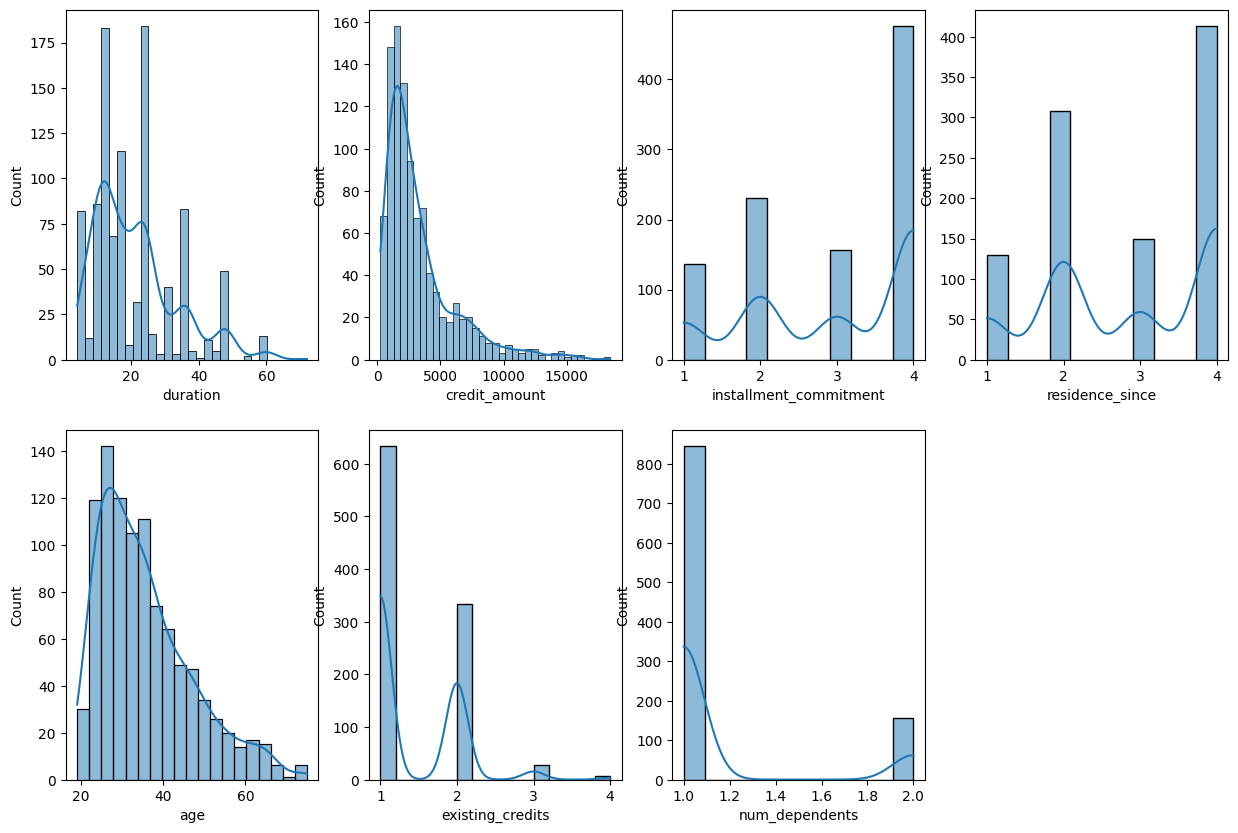

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for i in range(0,len(temp.columns)):
  plt.subplot(2,4,i+1)
  sns.histplot(data=df[temp.columns[i]], kde=True)

### Checking Outliers

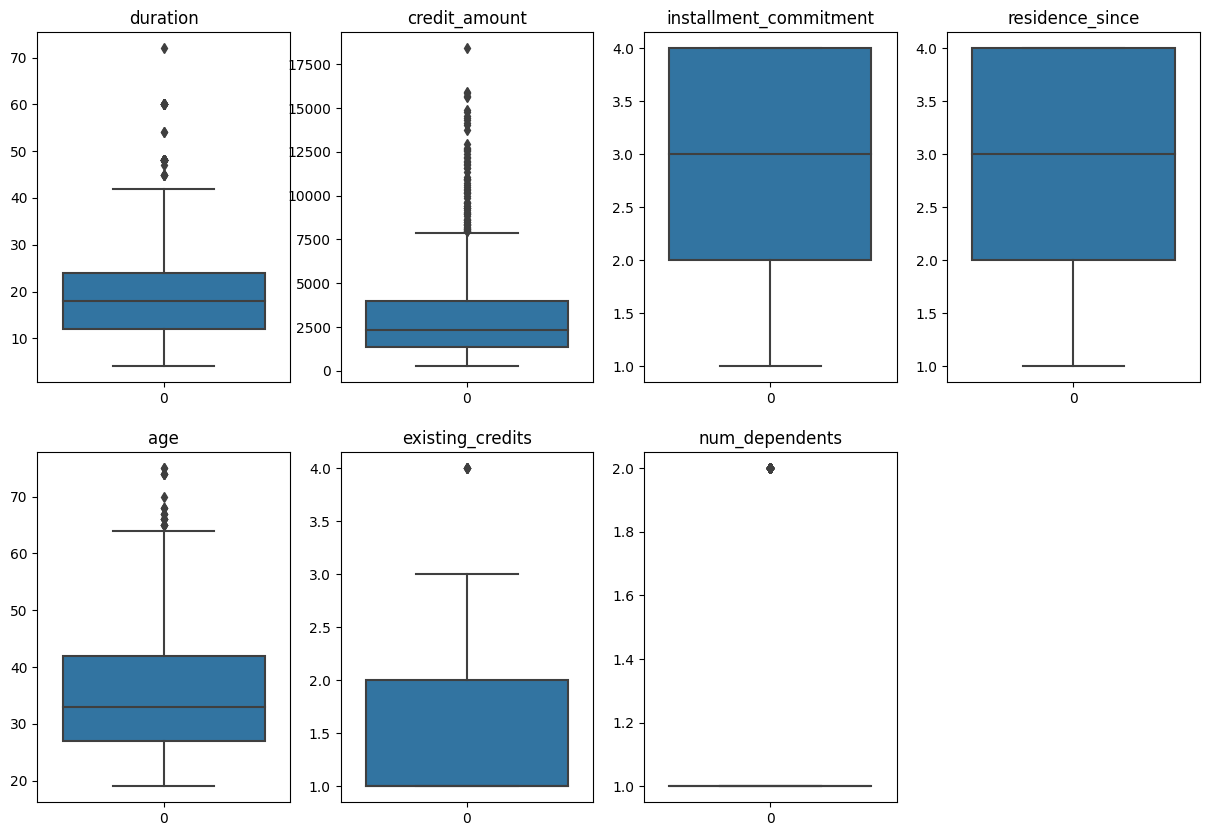

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for i in range(0,len(temp.columns)):
  plt.subplot(2,4,i+1)
  sns.boxplot(data=df[temp.columns[i]])
  plt.title(temp.columns[i])

### Checking Correlation

#### Chi Square Test for Numerical (Transformed) with Target

Spearman's rank correlation coefficient, often referred to as Spearman's rho (ρ), is a non-parametric measure of statistical dependence between two variables. Unlike Pearson's correlation coefficient, which assesses the linear relationship between two continuous variables, Spearman's correlation evaluates the monotonic relationship between two variables.

In [ ]:
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['age_bin']=pd.cut(df.age, bins, labels = labels,include_lowest = True)
df[['age_bin']]

age_bin
0     60-69
1     18-29
2     40-49
3     40-49
4     50-59
..      ...
995   30-39
996   30-39
997   30-39
998   18-29
999   18-29

[1000 rows x 1 columns]

In [ ]:
bins = [4.0, 13.0, 22.0, 31.0, 40.0, 49.0, 58.0, 67.0, 120.0]
labels = ['4-12', '13-21', '22-30', '31-39', '40-48', '49-57', '58-66', '67+']
df['duration_bin']=pd.cut(df.duration, bins, labels = labels,include_lowest = True)
df[['duration_bin']]

duration_bin
0           4-12
1          40-48
2           4-12
3          40-48
4          22-30
..           ...
995         4-12
996        22-30
997         4-12
998        40-48
999        40-48

[1000 rows x 1 columns]

In [ ]:
bins = [4.0, 13.0, 22.0, 31.0, 40.0, 49.0, 58.0, 67.0, 120.0]
labels = ['4-12', '13-21', '22-30', '31-39', '40-48', '49-57', '58-66', '67+']
df['duration_bin']=pd.cut(df.duration, bins, labels = labels,include_lowest = True)
df[['duration_bin']]

duration_bin
0           4-12
1          40-48
2           4-12
3          40-48
4          22-30
..           ...
995         4-12
996        22-30
997         4-12
998        40-48
999        40-48

[1000 rows x 1 columns]

In [ ]:
df['class']=np.where(df['class']=='good',0,1)

In [ ]:
import scipy
def hitung_chi(j,k):
  x=pd.pivot_table(df,index=df[j],columns=df[k],aggfunc='count',fill_value=0)['checking_status'].values
  y=scipy.stats.chi2_contingency(x)
  return y

In [ ]:
pd.pivot_table(df,index=df['duration_bin'],columns=df['class'],aggfunc='count',fill_value=0)['checking_status']

class           0   1
duration_bin         
4-12          287  76
13-21         157  66
22-30         166  75
31-39          52  40
40-48          30  35
49-57           1   1
58-66           7   6
67+             0   1

In [ ]:
a,b,c,d=hitung_chi('duration_bin','class')
print('duration_bin','class',b)

duration_bin class 1.9119728262992425e-07


In [ ]:
a,b,c,d=hitung_chi('age_bin','class')
print('age_bin','class',b)

age_bin class 0.021176048599386727


In [ ]:
from scipy.stats import pointbiserialr
pointbiserialr(df['class'].values,df['credit_amount'].values)

SignificanceResult(statistic=0.15473864110152383, pvalue=8.797572373528432e-07)

#### Chi Square Test for Each Categorical

The chi-square test is a statistical test used to determine if there is a significant association between two categorical variables. It is based on the chi-square statistic, which measures the difference between the observed and expected frequencies of each category in a contingency table. The test helps to determine whether the observed frequencies differ significantly from the expected frequencies, assuming that there is no association between the variables.

In [ ]:
x=pd.pivot_table(df,index=df['installment_commitment'],columns=df['existing_credits'],aggfunc='count',fill_value=0)['class'].values

In [ ]:
import scipy
scipy.stats.chi2_contingency(x)

Chi2ContingencyResult(statistic=9.08825202066701, pvalue=0.4291679891801145, dof=9, expected_freq=array([[ 86.088,  45.288,   3.808,   0.816],
       [146.223,  76.923,   6.468,   1.386],
       [ 99.381,  52.281,   4.396,   0.942],
       [301.308, 158.508,  13.328,   2.856]]))

In [ ]:
import scipy
def hitung_chi(j,k):
  x=pd.pivot_table(df,index=df[j],columns=df[k],aggfunc='count',fill_value=0)['class'].values
  y=scipy.stats.chi2_contingency(x)
  return y

if p value > 0.05 terima H0 (maka tidak ada relationship)

chi-square

p value>0.05 maka H0 diterima so there is no association

In [ ]:
for i in category:
  if i != 'class':
    for j in category:
      if j != 'class':
        a,b,c,d=hitung_chi(i,j)
        b = float(b)
        if b < 0.05:
          print(i,j,b)

checking_status checking_status 0.0
checking_status credit_history 1.9634727314197974e-08
checking_status purpose 3.170884677581102e-05
checking_status savings_status 1.6365301038541542e-14
checking_status employment 0.007096060339820733
checking_status other_parties 0.0006295182966969601
checking_status residence_since 0.0006791154422135567
checking_status property_magnitude 0.04537522703293845
checking_status housing 0.003439130301577489
checking_status existing_credits 0.03803772770656303
checking_status job 0.049395196074362324
credit_history checking_status 1.9634727314197974e-08
credit_history credit_history 0.0
credit_history purpose 1.11161098192696e-09
credit_history employment 0.0006414772575592431
credit_history personal_status 0.01212956729179965
credit_history other_payment_plans 1.2743825733424151e-16
credit_history housing 0.015279979756143208
credit_history existing_credits 2.4984355119783982e-84
credit_history num_dependents 0.04887564102122721
purpose checking_status 

In [ ]:
for i in category:
  if i != 'class':
    for j in category:
      if j != 'class':
        a,b,c,d=hitung_chi(i,j)
        if b > 0.05:
          print(i,j,b)

checking_status installment_commitment 0.44355975691332217
checking_status personal_status 0.13976132027499247
checking_status other_payment_plans 0.6391559577106465
checking_status num_dependents 0.11554866201401238
checking_status own_telephone 0.087863680240792
checking_status foreign_worker 0.09372710883054328
credit_history savings_status 0.20044971817169938
credit_history installment_commitment 0.6892423421433016
credit_history other_parties 0.05330441758456016
credit_history residence_since 0.11414399531969043
credit_history property_magnitude 0.08582395173007507
credit_history job 0.3974498653251681
credit_history own_telephone 0.2757509876105265
credit_history foreign_worker 0.29630576486386184
purpose existing_credits 0.27698920275460226
savings_status credit_history 0.20044971817169918
savings_status installment_commitment 0.3390667512854906
savings_status personal_status 0.4757727355795486
savings_status residence_since 0.13527929816201065
savings_status property_magnitude 

dapat dilihat bahwa banyak variabel dengan variabel lain yang memiliki korelasi sangat tinggi. tapi walaupun berkolerasi, mereka bukan kausalitas karena korelasi tersebut terjadi karena adanya pihak ketiga. oleh karena itu, tidak perlu untuk drop variabel2 yang berkorelasi tersebut

#### Chi Square Test for Categorical with Target

In [ ]:
import scipy
def hitung_chi(j,k):
  x=pd.pivot_table(df,index=df[j],columns=df[k],aggfunc='count',fill_value=0)['age'].values
  y=scipy.stats.chi2_contingency(x)
  return y

In [ ]:
for i in category:
  if i != 'age':
    a,b,c,d=hitung_chi(i,'class')
    if b > 0.05:
      print(i,'class',b)

installment_commitment class 0.1400333122128481
residence_since class 0.8615521320413175
existing_credits class 0.4451440800083001
job class 0.5965815918843431
num_dependents class 1.0
own_telephone class 0.27887615430357426


dapat dilihat bahwa hasil p value untuk num dependents dan residence since memiliki nilai paling tinggi dari yang lain, sehingga kami memutuskan untuk drop variable tersebut

GABOLE REMOVE LANGSUNG, HARUS ADA REASONNYA

nanti tetep pake yg installment commitment karna punya p value yg <0.2, tinggal 1 lg

## Exploratory Data Analysis

Exploratory Data Analysis adalah proses menganalisis sekumpulan data untuk meringkas karakteristik utamanya agar pengguna lebih memahami dataset yang akan digunakan. EDA juga merupakan uji investigasi awal yang bertujuan untuk mengidentifikasi pola, menemukan anomali, menguji hipotesis dan memeriksa asumsi

Dengan melakukan EDA, diharapkan peneliti juga mendapatkan beberapa informasi penting yang berguna nantinya untuk kemajuan perusahaan.

### Age with Credit Amount

In [ ]:
y=df.groupby(['age_bin'])['credit_amount'].agg('median').reset_index()

In [ ]:
y

age_bin  credit_amount
0   18-29         2221.0
1   30-39         2397.0
2   40-49         2375.0
3   50-59         2224.0
4   60-69         1655.0
5     70+         3987.0

<Axes: xlabel='age_bin', ylabel='credit_amount'>

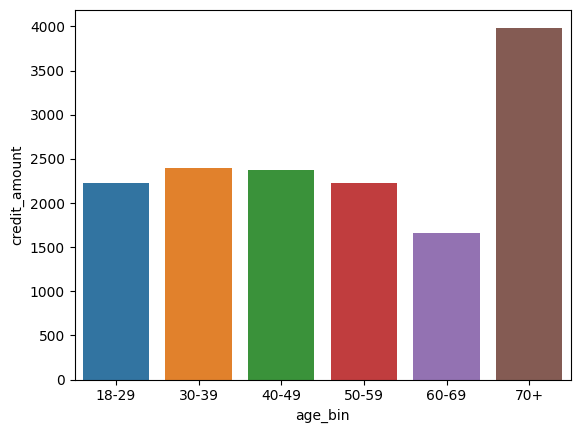

In [ ]:
sns.barplot(x=y.age_bin,y=y.credit_amount)

In [ ]:
df['credit_amount'][df['age_bin']=='70+']

186    5129.0
330    6615.0
430    3448.0
536    1374.0
606    4526.0
756    1299.0
Name: credit_amount, dtype: float64

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig=go.Figure(data=px.bar(y,'age_bin',y='credit_amount',color=['#CD5C5C','#F08080','#FA8072','#E9967A','#FFA07A','#DE3163'],color_discrete_map='identity'))
fig.update_layout(title_font={'family':'times new roman'},title_text='Age Categories and Credit Amount Relate',title_x=0.5)
fig.update_layout(font={'family':'times new roman'})
fig.show()

Saya menggunakan median sebagai acuan untuk menghitung seberapa banyak responden dengan umur yang dibagi menjadi beberapa kategori/bin sebagai berikut terhadap jumlah credit yang digunakan

Kesimpulan: berdasakan barplot yang disajikan, terdapat persamaan jumlah credit yang digunakan oleh beberapa kategori umur. Namun terdapat penurunan jumlah kredit pada kategori umur 60-69 dan kenaikan drastis pada kategori umur 70+ dengan jumlah responden adalah 7 orang. Hal ini dapat disimpulkan bahwa pada responden dengan kategori umur 70+ memiliki pinjaman kredit dengan nilai yang lebih banyak dan lebih besar daripada kategori umur lainnya

### Installment Commitment Categories with Credit Amount

In [ ]:
a=df.groupby(['installment_commitment'])['credit_amount'].agg('median').reset_index()

In [ ]:
a

installment_commitment  credit_amount
0                     1.0         3423.0
1                     2.0         3029.0
2                     3.0         2631.0
3                     4.0         1843.5

<Axes: xlabel='installment_commitment', ylabel='credit_amount'>

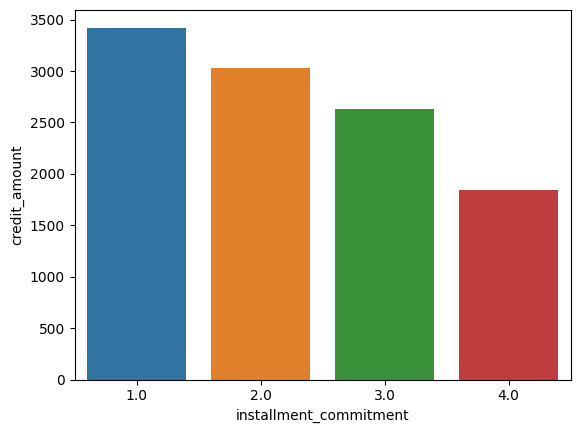

In [ ]:
sns.barplot(x=a.installment_commitment,y=a.credit_amount)

In [ ]:
px.bar(a,'installment_commitment',y='credit_amount')

In [ ]:
import plotly.graph_objects as go

fig=go.Figure(data=px.bar(a,'installment_commitment',y='credit_amount',color=['#2874A6','#2E86C1','#3498DB','#5DADE2'],color_discrete_map='identity'))
fig.update_layout(title_font={'family':'times new roman'},title_text='Installment Commitment Categories and Credit Amount Relate',title_x=0.5)
fig.update_layout(font={'family':'times new roman'})
fig.show()

Data Installment Commitment merupakan tingkatan angsuran dalam persentase pendapatan yang dapat dibelanjakan. Tingkat angsuran ini bertujuan untuk membantu dalam mengelola finansial seseorang dengan memastikan bahwa pembayaran angsuran tidak melebihi batas yang dapat mereka tanggung (pendapatan).

Tingkat 1 memiliki arti bahwa persentase pendapatan yang digunakan untuk membayar angsuran tidak melebihi batas yang direkomendasikan (masih memiliki sisa pendapatan yang cukup untuk kebutuhan lainnya),

Tingkat 2 memiliki arti bahwa persentase pendapatan yang digunakan untuk membayar angsuran sedikit melebihi batas yang direkomendasikan meskipun masih dapat dikelola. Akan tetapi, individu yang berada di tingkatan ini diharapkan berhati-hati dalam mengelola pengeluaran karena ditakutkan adanya perubahan tak terduga pada finansialnya.

Tingkat 3 memiliki arti bahwa persentase pendapatan yang digunakan untuk membayar angsuran jauh melebihi batas yang direkomendasikan dan menandakan suatu individu yang berada di tingkatan ini sangat beresiko mengalami kesulitan finansial untuk mencukupi kebutuhan lainnya.

Tingkat 4 memiliki arti bahwa persentase pendapatan yang digunakan untuk membayar angsuran melebihi kemampuan finansialnya atau dengan kata lain mengalami krisis keuangan yang serius.

Seseorang yang berada pada tingkat 3 dan 4 sangat diwaspadai dan diharapkan untuk mencari cara agar dapat mengurangi biaya angsuran atau mengatur ulang struktur pembayaran agar lebih terjangkau atau bahkan mencari bantuan profesional, seperti konselor keuangan atau lembaga penyelesaian utang guna menemukan solusi yang tepat dan mengelola kembali keuangan dengan baik.

Kesimpulan: berdasarkan visualisasi barplot tersebut dapat disimpulkan bahwa tingkat angsuran dalam persentase pendapatan yang dapat dibelanjakan menurun seiring bertambahnya tingkatan. Hal ini merupakan hasil yang baik karena jumlah responden dengan tingkatan 1 dan 2 jauh lebih banyak dan menandakan bahwa responden tersebut memiliki cukup pendapatan yang memadai untuk membayar angsuran dan membeli kebutuhan lainya

### Job Categories with Credit Amount

In [ ]:
df.job.unique()

array(['skilled', 'unskilled resident', 'high qualif/self emp/mgmt',
       'unemp/unskilled non res'], dtype=object)

In [ ]:
job=df.groupby(['job'])['credit_amount'].agg('median').reset_index()

In [ ]:
job

job  credit_amount
0  high qualif/self emp/mgmt         4459.0
1                    skilled         2324.0
2    unemp/unskilled non res         1416.0
3         unskilled resident         1622.0

semakin tinggi kualifikasi job semakin banyak dia bisa mengajukan kredit dengan nilai tinggi

<Axes: xlabel='job', ylabel='credit_amount'>

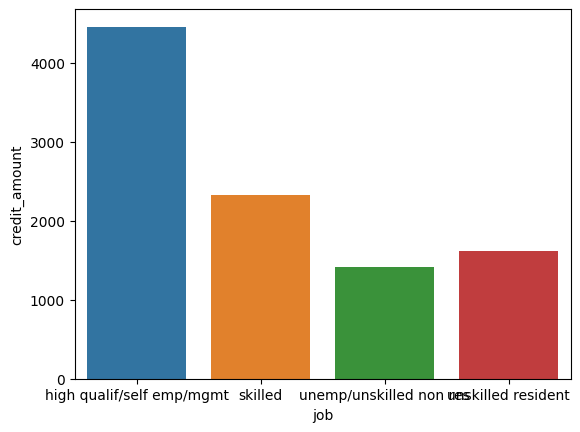

In [ ]:
sns.barplot(x=job.job,y=job.credit_amount)

In [ ]:
import plotly.graph_objects as go

fig=go.Figure(data=px.bar(job,'job',y='credit_amount',color=['#B2AC88','#7aa16c','#6d8f60','#5f7d54'],color_discrete_map='identity'))
fig.update_layout(title_font={'family':'times new roman'},title_text='Job Qualification and Credit Amount Relate',title_x=0.5)
fig.update_layout(font={'family':'times new roman'})
fig.show()

Data Job merupakan klasifikasi pekerjaan responden yang dibagi berdasarkan kualifikasi kemampuan/jabatan suatu responden dalam pekerjaannya.

High qualif/self emp/mgmt = responden yang memiliki kualifikasi tinggi dengan posisi pekerjaan yang membutuhkan keterampilan lanjutan dan bekerja secara independen serta bertanggung jawab penuh terhadap operasional bisnis mereka

Skilled = responden yang memiliki keterampilan khusus dalam bidang tertentu namun memiliki tingkatan yang lebih rendah dari responden High qualif/self emp/mgmt dan bekerja di bawah industri tertentu

Unemp/unskilled non res = responden yang tidak memiliki pekerjaan atau keterampilan khusus (pengangguran) dan juga bukan merupakan penduduk tetap suatu daerah

Unskilled resident = responden yang tidak memiliki keterampilan khusus akan tetapi merupakan penduduk tetap suatu daerah

Kesimpulan: berdasarkan barplot kualifikasi job dengan credit amount diatas dapat disimpulkan bahwa responden dengan high qualified memiliki jumlah credit lebih banyak karena diasumsikan memiliki pendapatan dan kredit yang lebih banyak dibandingkan dengan kualifikasi lainnya. Sedangkan responden unemployed/unskilled non resident memiliki nilai yang paling rendah dalam jumlah credit amount.

Dapat diasumsikan bahwa kualifikasi job disini memiliki keterkaitan dengan banyaknya pendapatan yang dihasilkan dan kebutuhan yang dibutuhkan sehingga memungkinkan suatu individu untuk melakukan kredit.

### Gender (from personal_status) with Credit Amount

In [ ]:
df.personal_status.unique()

array(['male single', 'female div/dep/mar', 'male div/sep',
       'male mar/wid'], dtype=object)

kami melakukan perubahan data pada personal_status karena ketidakjelasan isi variabel sehingga dikhawatirkan akan terjadi bias. sehingga personal_status diubah menjadi gender

In [ ]:
df.personal_status=df['personal_status'].apply(lambda x : x.split()[0])

In [ ]:
df=df.rename(columns={'personal_status':'gender'})

In [ ]:
category.remove('personal_status')

In [ ]:
category.append('gender')

<Axes: xlabel='gender', ylabel='count'>

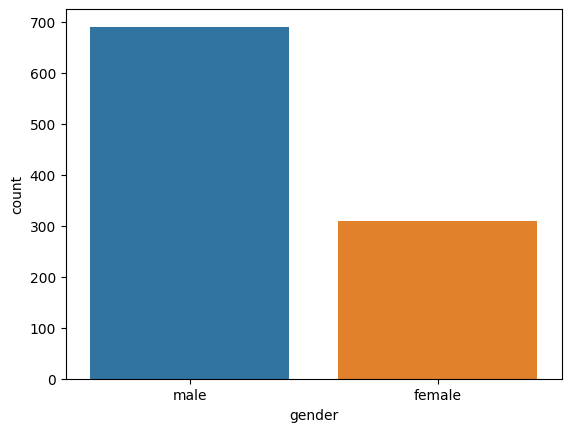

In [ ]:
sns.countplot(x=df.gender)

In [ ]:
gender_count=df.groupby(['gender'])['credit_amount'].count().reset_index()

In [ ]:
gender_count

gender  credit_amount
0  female            310
1    male            690

([<matplotlib.patches.Wedge at 0x7f73b8392110>,
 [Text(0.6182917088228991, 0.9097886363331099, 'female'),
  Text(-0.618291708822899, -0.9097886363331099, 'male')],
 [Text(0.33725002299430856, 0.4962483470907872, '31'),
  Text(-0.33725002299430845, -0.4962483470907872, '69')])

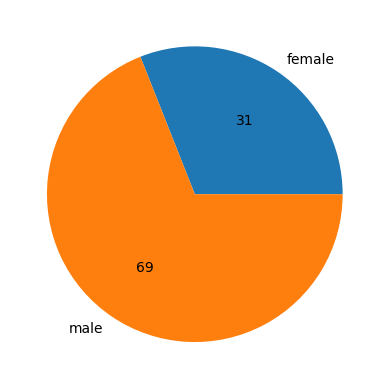

In [ ]:
plt.pie(gender_count.credit_amount,labels=gender_count.gender,autopct='%.0f')

In [ ]:
import plotly.express as px
px.pie(gender_count,'gender',values='credit_amount')

In [ ]:
import plotly.graph_objects as go

fig=go.Figure(data=px.pie(df,values=gender_count.credit_amount,names=gender_count.gender,color_discrete_sequence=px.colors.sequential.RdBu))
fig.update_layout(title_font={'family':'times new roman'},title_text='Gender Count of Credit Amount',title_x=0.5)
fig.update_layout(font={'family':'times new roman'})
fig.show()

### Proportion of Job and Foreign Worker

In [ ]:
b=df.groupby(['job','foreign_worker'])['job'].size().reset_index(name='count')

<Axes: xlabel='job', ylabel='count'>

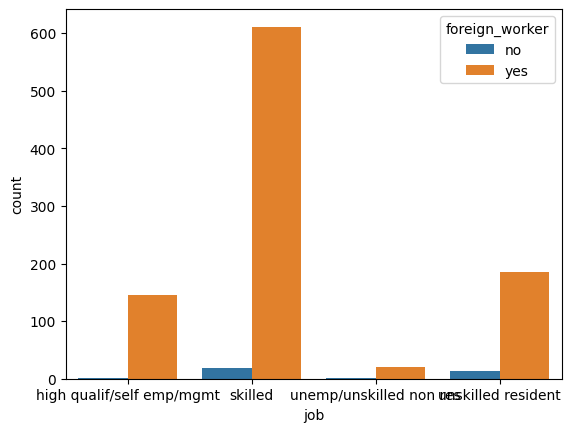

In [ ]:
import numpy as np
sns.barplot(data=b,x=b['job'],y=b['count'],hue='foreign_worker')

In [ ]:
b[(b['job']=='high qualif/self emp/mgmt') & (df['foreign_worker']=='yes')][['count']]

<ipython-input-87-ec7152c11dc6>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



count
0      2
1    146

In [ ]:
c=df.groupby(['age_bin','class'])['age_bin'].size().reset_index(name='count')

In [ ]:
c

age_bin  class  count
0    18-29      0    263
1    18-29      1    148
2    30-39      0    235
3    30-39      1     80
4    40-49      0    120
5    40-49      1     41
6    50-59      0     47
7    50-59      1     21
8    60-69      0     30
9    60-69      1      9
10     70+      0      5
11     70+      1      1

<Axes: xlabel='age_bin', ylabel='count'>

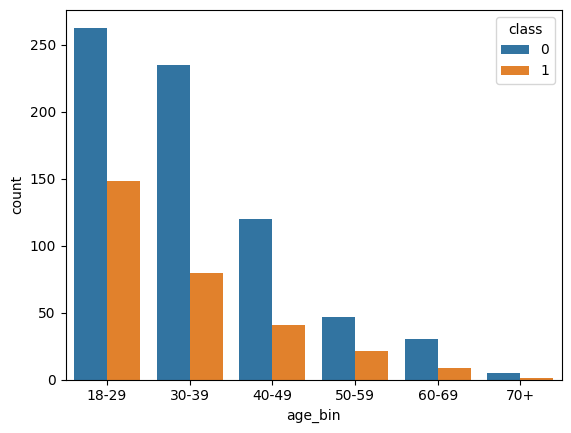

In [ ]:
sns.barplot(data=c,x=c['age_bin'],y=c['count'],hue='class')

## Tests

### Transform Credit Amount Data

Text(0.5, 1.0, 'Credit Amount Before Transformation')

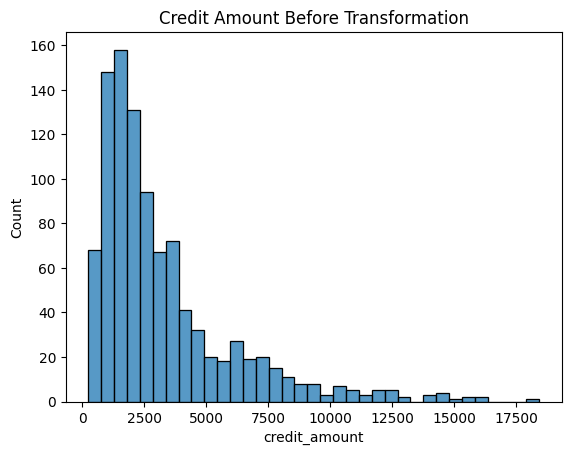

In [ ]:
sns.histplot(df.credit_amount)
plt.title('Credit Amount Before Transformation')

In [ ]:
import scipy
scipy.stats.shapiro(df['credit_amount'].sort_values().values)

ShapiroResult(statistic=0.7933971881866455, pvalue=8.609912964372653e-34)

Text(0.5, 1.0, 'Credit Amount After Transformation')

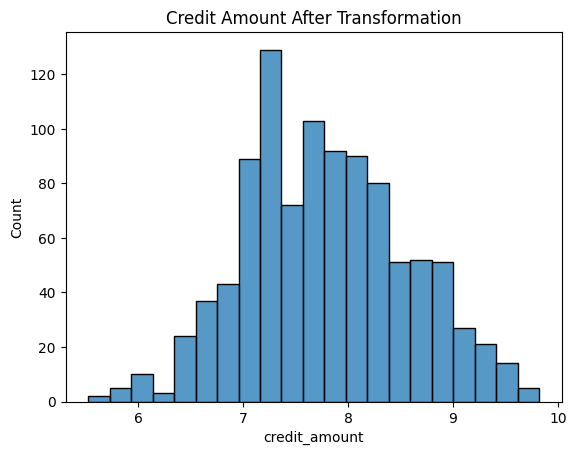

In [ ]:
import numpy as np
log_credit=np.log(df.credit_amount)
sns.histplot(log_credit)
plt.title('Credit Amount After Transformation')

In [ ]:
import scipy
scipy.stats.shapiro(log_credit.sort_values().values)

ShapiroResult(statistic=0.9930399656295776, pvalue=0.00012452519149519503)

Kesimpulan: p<0.05 maka Ho ditolak H1 diterima

Penjelasan: walaupun data credit_amount telah ditransformasi, berdasarkan hasil test shapiro terhadap data credit amount sebelum transformasi dan setelah transformasi didapatkan hasil bahwa p value keduanya < 0.05. Oleh karena itu, data tersebut tidak termasuk data dengan Normal Distribution.

### Transform Duration Data

Text(0.5, 1.0, 'Duration Before Transformation')

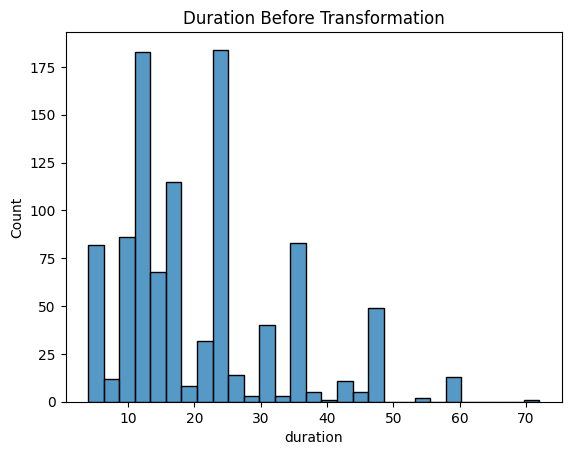

In [ ]:
sns.histplot(df.duration)
plt.title('Duration Before Transformation')

In [ ]:
scipy.stats.shapiro(df['duration'].sort_values().values)

ShapiroResult(statistic=0.8997893929481506, pvalue=4.908334953558791e-25)

Text(0.5, 1.0, 'Duration After Transformation')

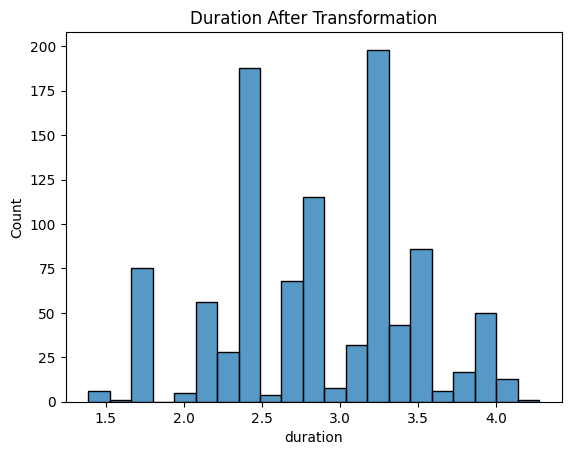

In [ ]:
log_duration=np.log(df.duration)
sns.histplot(log_duration)
plt.title('Duration After Transformation')

In [ ]:
scipy.stats.shapiro(log_duration.sort_values().values)

ShapiroResult(statistic=0.9730959534645081, pvalue=1.1783049579452975e-12)

Kesimpulan: p<0.05 maka Ho ditolak H1 diterima

Penjelasan: walaupun data duration telah ditransformasi, berdasarkan hasil test shapiro terhadap data duration sebelum transformasi dan setelah transformasi didapatkan hasil bahwa p value keduanya < 0.05. Oleh karena itu, data tersebut tidak termasuk data dengan Normal Distribution.

### Duration and Age_bin

<Axes: xlabel='age_bin', ylabel='duration'>

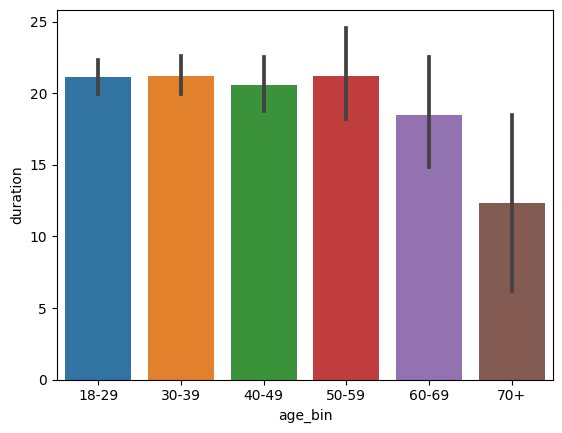

In [ ]:
sns.barplot(x=df.age_bin,y=df.duration,estimator=np.mean)

Berdasarkan gambar diatas dapat disimpulkan bahwa tidak terlihat adanya banyak perbedaan nilai duration antara kategori age_bin 19-29 dengan 30-39 dan 50-59 sehingga diperlukan tes menggunakan Kruskal karena kedua data tersebut termasuk data non parametric

Data diatas dapat dilihat secara subjektif bahwa kategori umur 18-29, 30-39 dan 50-59 memiliki nilai yang hampir dikatakan sama. Akan tetapi kita tidak bisa hanya dengan melihat dari gambar grafik saja, oleh karena itu adanya beberapa tes seperti KSTest, Mann Whitney, Kruskal, dll untuk mengetahui apakah data tersebut benar sama atau malah berbeda.

Karena grafik di atas kita dapatkan dari menghitung median age_bin terhadap duration maka didapatkan nilai dari beberapa kategori yang dilihat secara grafik 'sama'. namun jika sudah masuk ke tes seperti kruskal (kita menggunakan kruskal karena data >2), didapatkan kesimpulan bahwa p>0.05 yang berarti H0 ditolak dan memiiki arti bahwa nilai kategori2 umur terhadap duration tersebut sebenarnya memiliki data yang sangat berbeda. karena

In [ ]:
x1=df['duration'][df['age_bin']=='18-29']
x2=df['duration'][df['age_bin']=='30-39']
x3=df['duration'][df['age_bin']=='50-59']

In [ ]:
import scipy.stats as stats
stats.kruskal(x1, x2, x3)

KruskalResult(statistic=0.13463747961381334, pvalue=0.934897164899444)

mann whitney

p value < 0.05 maka tolak H0 (H0 means equal) dan terima alternative (two sided means different)

p value > 0.05 maka terima H0

confidence value (p-value) untuk tes Mann Whitney adalah p<0.05

jika nilai p<0.05 maka alternative diterima dan h0 ditolak
jika niai p>0.05 maka alternative ditolak dan h0 diterima (2 distribusi bernilai sama)

<Axes: xlabel='installment_commitment', ylabel='credit_amount'>

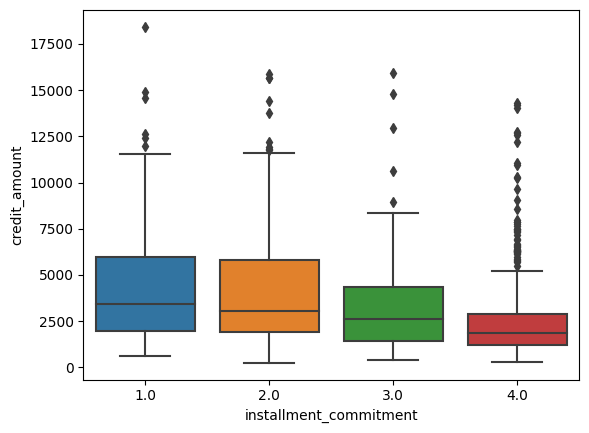

In [ ]:
sns.boxplot(data=df,x='installment_commitment',y='credit_amount')

## Logistic Regression

In [ ]:
y=df.pop('class')

In [ ]:
x=df[['age_bin','duration_bin']]

In [ ]:
df=df.drop('duration',axis=1)

In [ ]:
df=df.drop('age',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [ ]:
x_train

age_bin duration_bin
290   18-29         4-12
167   18-29         4-12
486   50-59         4-12
683   40-49        22-30
876   30-39        13-21
..      ...          ...
575   18-29        13-21
838   60-69        22-30
337   18-29        13-21
523   18-29        22-30
863   30-39        22-30

[700 rows x 2 columns]

#### Multivariate Analysis Regression

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels
oh=OneHotEncoder(sparse_output=False)
oh.fit(x_train)

OneHotEncoder(sparse_output=False)

In [ ]:
x_train

age_bin duration_bin
290   18-29         4-12
167   18-29         4-12
486   50-59         4-12
683   40-49        22-30
876   30-39        13-21
..      ...          ...
575   18-29        13-21
838   60-69        22-30
337   18-29        13-21
523   18-29        22-30
863   30-39        22-30

[700 rows x 2 columns]

In [ ]:
oh.categories_

[array(['18-29', '30-39', '40-49', '50-59', '60-69', '70+'], dtype=object),
 array(['13-21', '22-30', '31-39', '4-12', '40-48', '49-57', '58-66',
        '67+'], dtype=object)]

In [ ]:
x_train1=oh.transform(x_train)

In [ ]:
x_train1

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
model=LogisticRegression().fit(x_train1,y_train)

In [ ]:
y_train

290    0
167    0
486    0
683    0
876    0
      ..
575    0
838    0
337    1
523    0
863    0
Name: class, Length: 700, dtype: int64

In [ ]:
x_test1=oh.transform(x_test)

In [ ]:
y_pred=model.predict(x_test1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6866666666666666

In [ ]:
model.coef_

array([[ 0.48203892, -0.0989187 , -0.04337925,  0.26369079, -0.02062342,
        -0.58328012, -0.35822729, -0.20005221,  0.09723376, -0.8557345 ,
         0.39521126,  0.20094581,  0.2776111 ,  0.44254029]])

In [ ]:
model.intercept_

array([-0.69437922])

In [ ]:
import statsmodels.api as sm
import statsmodels.tools as tools
x_train_const=tools.add_constant(np.array(x_train1))
model1 = sm.Logit(y_train,x_train_const).fit()

         Current function value: 0.575545
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
model1.llr_pvalue

0.00010392026414677328

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                  700
Model:                          Logit   Df Residuals:                      687
Method:                           MLE   Df Model:                           12
Date:                Tue, 13 Jun 2023   Pseudo R-squ.:                 0.04620
Time:                        06:40:37   Log-Likelihood:                -402.88
converged:                      False   LL-Null:                       -422.40
Covariance Type:            nonrobust   LLR p-value:                 0.0001039
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4631    4.7e+06  -9.85e-08      1.000   -9.22e+06    9.22e+06
x1             2.6930   4.82e+06   5.59e-07      1.000   -9.44e+06    9.44e+06
x2             2.1057    4.4e+06   4.79e-07      1.000   -8.62e+06    8.62e+06
x3             2.1662   5.39e+06   4.02e-07      1.000   -1.06e+07    1.06e+07
x4             2.4895   4.82e+06   5.17e-07      1.000   -9.44e+06    9.44e+06
x5             2.1817   4.61e+06   4.73e-07      1.000   -9.04e+06    9.04e+06
x6           -12.0993   5.01e+06  -2.41e-06      1.000   -9.83e+06    9.83e+06
x7            -2.8102        nan        nan        nan         nan         nan
x8            -2.6366        nan        nan        nan         nan         nan
x9            -2.3369        nan        nan        nan         nan         nan
x10           -3.3122        nan        nan        nan         nan         nan
x11           -2.0080        nan        nan        nan         nan         nan
x12           -1.8345        nan        nan        nan         nan         nan
x13           -2.0201        nan        nan        nan         nan         nan
x14           16.4955        nan        nan        nan         nan         nan
==============================================================================
"""

In [ ]:
import seaborn as sns

In [ ]:
x_test

age_bin duration_bin
545   40-49        22-30
298   40-49        13-21
109   30-39        13-21
837   18-29         4-12
194   18-29        40-48
..      ...          ...
847   18-29        22-30
682   30-39        13-21
884   40-49        22-30
325   30-39         4-12
482   50-59        22-30

[300 rows x 2 columns]

In [ ]:
df_test=pd.merge(x_test,y_test,how='inner',left_index=True,right_index=True)

<Axes: xlabel='duration_bin', ylabel='count'>

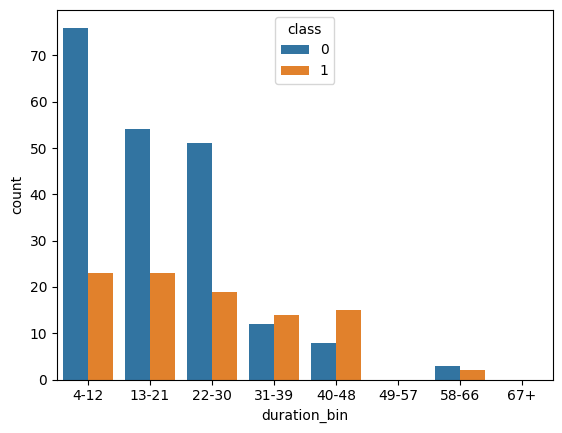

In [ ]:
sns.countplot(df_test,x='duration_bin',hue='class')

In [ ]:
df[df['duration_bin']=='49-57']

checking_status       credit_history   purpose  credit_amount  \
78     no checking  no credits/all paid  used car         9436.0   
95        0<=X<200  no credits/all paid  business        15945.0   

      savings_status employment  installment_commitment gender other_parties  \
78  no known savings     1<=X<4                     2.0   male          none   
95              <100         <1                     3.0   male          none   

    residence_since property_magnitude other_payment_plans housing  \
78              2.0     life insurance                none     own   
95              4.0  no known property                none    rent   

    existing_credits                 job  num_dependents own_telephone  \
78               1.0  unskilled resident             2.0          none   
95               1.0             skilled             1.0           yes   

   foreign_worker age_bin duration_bin  
78            yes   30-39        49-57  
95            yes   50-59        49-57

<Axes: xlabel='age_bin', ylabel='count'>

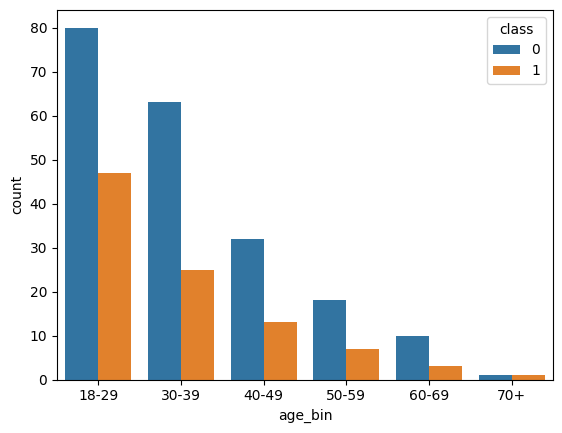

In [ ]:
sns.countplot(df_test,x='age_bin',hue='class')

#### Univariate Analysis Regression

##### Age_bin

In [ ]:
oh=OneHotEncoder(sparse_output=False)
oh.fit(x_train[['age_bin']])

OneHotEncoder(sparse_output=False)

In [ ]:
oh.categories_

[array(['18-29', '30-39', '40-49', '50-59', '60-69', '70+'], dtype=object)]

In [ ]:
x_train2=oh.transform(x_train[['age_bin']])

In [ ]:
x_train2

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [ ]:
model=LogisticRegression().fit(x_train2,y_train)

In [ ]:
x_test2=oh.transform(x_test[['age_bin']])

In [ ]:
y_pred2=model.predict(x_test2)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.68

In [ ]:
model.coef_

array([[ 0.48728499, -0.0498544 , -0.05351279,  0.32613131, -0.09447515,
        -0.61547364]])

In [ ]:
model.intercept_

array([-1.08911853])

In [ ]:
import statsmodels.api as sm
import statsmodels.tools as tools
x_train_const=tools.add_constant(np.array(x_train2))
model2 = sm.Logit(y_train,x_train_const).fit()

         Current function value: 0.594035
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                  700
Model:                          Logit   Df Residuals:                      694
Method:                           MLE   Df Model:                            5
Date:                Tue, 13 Jun 2023   Pseudo R-squ.:                 0.01556
Time:                        06:40:38   Log-Likelihood:                -415.82
converged:                      False   LL-Null:                       -422.40
Covariance Type:            nonrobust   LLR p-value:                   0.02204
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1897        nan        nan        nan         nan         nan
x1             3.5954        nan        nan        nan         nan         nan
x2             3.0496        nan        nan        nan         nan         nan
x3             3.0446        nan        nan        nan         nan         nan
x4             3.4615        nan        nan        nan         nan         nan
x5             2.9858        nan        nan        nan         nan         nan
x6           -20.3265        nan        nan        nan         nan         nan
==============================================================================
"""

In [ ]:
model2.llr_pvalue

0.022036916876563666

##### Duration_bin

In [ ]:
oh=OneHotEncoder(sparse_output=False)
oh.fit(x_train[['duration_bin']])

OneHotEncoder(sparse_output=False)

In [ ]:
oh.categories_

[array(['13-21', '22-30', '31-39', '4-12', '40-48', '49-57', '58-66',
        '67+'], dtype=object)]

In [ ]:
x_train3=oh.transform(x_train[['duration_bin']])

In [ ]:
model=LogisticRegression().fit(x_train3,y_train)

In [ ]:
x_test3=oh.transform(x_test[['duration_bin']])

In [ ]:
y_pred3=model.predict(x_test3)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred3)

0.68

In [ ]:
model.coef_

array([[-0.36108535, -0.21333093,  0.06558417, -0.86091178,  0.37023149,
         0.16550815,  0.33315999,  0.49969386]])

In [ ]:
model.intercept_

array([-0.50049296])

In [ ]:
import statsmodels.api as sm
import statsmodels.tools as tools
x_train_const=tools.add_constant(np.array(x_train3))
model3 = sm.Logit(y_train,x_train_const).fit()

         Current function value: 0.584666
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
model3.llr_pvalue

0.0004517531097603334

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                  700
Model:                          Logit   Df Residuals:                      692
Method:                           MLE   Df Model:                            7
Date:                Tue, 13 Jun 2023   Pseudo R-squ.:                 0.03109
Time:                        06:40:39   Log-Likelihood:                -409.27
converged:                      False   LL-Null:                       -422.40
Covariance Type:            nonrobust   LLR p-value:                 0.0004518
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8979        nan        nan        nan         nan         nan
x1            -2.7714        nan        nan        nan         nan         nan
x2            -2.6175        nan        nan        nan         nan         nan
x3            -2.3287        nan        nan        nan         nan         nan
x4            -3.2795        nan        nan        nan         nan         nan
x5            -1.9932        nan        nan        nan         nan         nan
x6            -1.8979        nan        nan        nan         nan         nan
x7            -1.8979        nan        nan        nan         nan         nan
x8            18.6839        nan        nan        nan         nan         nan
==============================================================================
"""

## Decision Tree

In [ ]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
LGBM=LGBMClassifier()
GPC=GaussianProcessClassifier()
RF=RandomForestClassifier()
XG=XGBClassifier()
GB=GradientBoostingClassifier()
DT=DecisionTreeClassifier()
models=[GPC,RF,XG,GB,DT,LGBM]

In [ ]:
from sklearn.model_selection import StratifiedKFold

### Age_bin and Duration_bin

In [ ]:
transform_category=ColumnTransformer([('transform', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), ['age_bin','duration_bin'])])

In [ ]:
score=[]
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
for i in models:
  shuffle=StratifiedKFold(n_splits=10,random_state=101,shuffle=True)
  estimator=Pipeline([('scaler',transform_category),('models',i)])
  model_score=cross_validate(estimator,x_train,y_train,cv=shuffle,scoring='recall')
  score.append(model_score)
score
train_cv=pd.DataFrame(score)
train_cv
list=[]
for i in range(0,train_cv.shape[0]):
  for j in range(0,train_cv.shape[1]):
    list.append(train_cv.iloc[i,j].mean())
data=np.array(list).reshape(6,3)
data_hasil=pd.DataFrame(data).rename(columns={0:'fit_time',1:'score_time',2:'test_score'})
data_hasil['models']=['GPC','RF','XG','GB','DT','LGBM']
data_hasil.sort_values('test_score',ascending=False)

fit_time  score_time  test_score models
2  0.368162    0.009241    0.136667     XG
5  0.035870    0.005801    0.127381   LGBM
1  0.181809    0.014660    0.117857     RF
4  0.005079    0.003726    0.112619     DT
3  0.110821    0.004883    0.107857     GB
0  0.382169    0.013725    0.103095    GPC

In [ ]:
pipe_xg=Pipeline([('scaler',transform_category),('modelsXGBoost',XG)])
model1_1=pipe_xg.fit(x_train,y_train)
y_pred1_1=model1_1.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report
XG_acc=accuracy_score(y_pred1_1,y_test)

In [ ]:
x_train

age_bin duration_bin
290   18-29         4-12
167   18-29         4-12
486   50-59         4-12
683   40-49        22-30
876   30-39        13-21
..      ...          ...
575   18-29        13-21
838   60-69        22-30
337   18-29        13-21
523   18-29        22-30
863   30-39        22-30

[700 rows x 2 columns]

In [ ]:
x_test

age_bin duration_bin
545   40-49        22-30
298   40-49        13-21
109   30-39        13-21
837   18-29         4-12
194   18-29        40-48
..      ...          ...
847   18-29        22-30
682   30-39        13-21
884   40-49        22-30
325   30-39         4-12
482   50-59        22-30

[300 rows x 2 columns]

<Axes: >

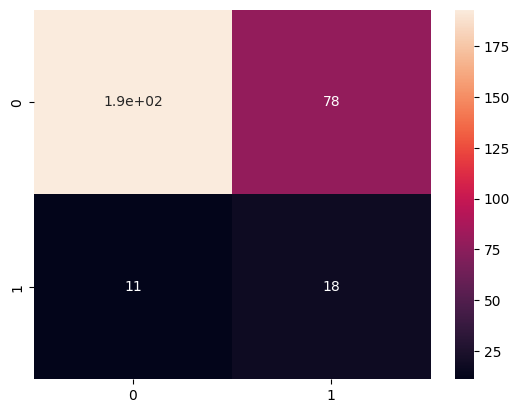

In [ ]:
sns.heatmap(confusion_matrix(y_pred1_1,y_test),annot=True)

In [ ]:
print(classification_report(y_pred1_1,y_test))

              precision    recall  f1-score   support

           0       0.95      0.71      0.81       271
           1       0.19      0.62      0.29        29

    accuracy                           0.70       300
   macro avg       0.57      0.67      0.55       300
weighted avg       0.87      0.70      0.76       300



In [ ]:
pipe_rf=Pipeline([('scaler',transform_category),('modelsRF',RF)])
model1_2=pipe_rf.fit(x_train,y_train)
y_pred1_2=model1_2.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report
RF_acc=accuracy_score(y_pred1_2,y_test)

<Axes: >

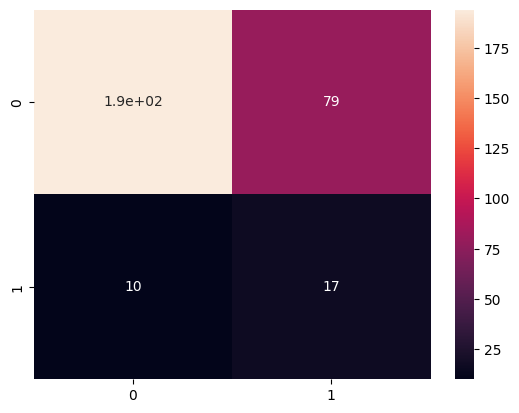

In [ ]:
sns.heatmap(confusion_matrix(y_pred1_2,y_test),annot=True)

In [ ]:
print(classification_report(y_pred1_2,y_test))

              precision    recall  f1-score   support

           0       0.95      0.71      0.81       273
           1       0.18      0.63      0.28        27

    accuracy                           0.70       300
   macro avg       0.56      0.67      0.54       300
weighted avg       0.88      0.70      0.77       300



In [ ]:
model1_1.feature_names_in_

array(['age_bin', 'duration_bin'], dtype=object)

Text(0.5, 1.0, 'Feature Importances\n Credit Risk Customers with XGBoost Algorithm')

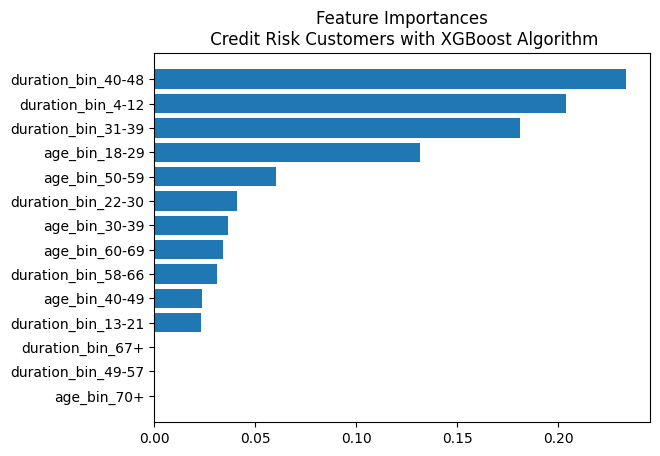

In [ ]:
importances=pipe_xg[-1].feature_importances_
features=pipe_xg.named_steps['scaler'].named_transformers_['transform'].get_feature_names_out(['age_bin','duration_bin'])
import matplotlib.pyplot as plt
data=pd.DataFrame(zip(features, importances), columns=['feature', 'importance']).sort_values('importance',ascending=True)
plt.barh(width=data['importance'],y=data['feature'])
plt.title('Feature Importances\n Credit Risk Customers with XGBoost Algorithm')

Text(0.5, 1.0, 'Feature Importances\n Credit Risk Customers with RF Algorithm')

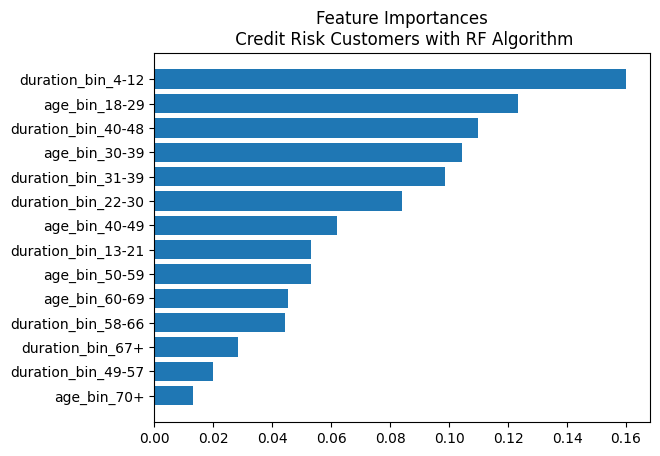

In [ ]:
importances=pipe_rf[-1].feature_importances_
features=pipe_rf.named_steps['scaler'].named_transformers_['transform'].get_feature_names_out(['age_bin','duration_bin'])
data=pd.DataFrame(zip(features, importances), columns=['feature', 'importance']).sort_values('importance',ascending=True)
plt.barh(width=data['importance'],y=data['feature'])
plt.title('Feature Importances\n Credit Risk Customers with RF Algorithm')

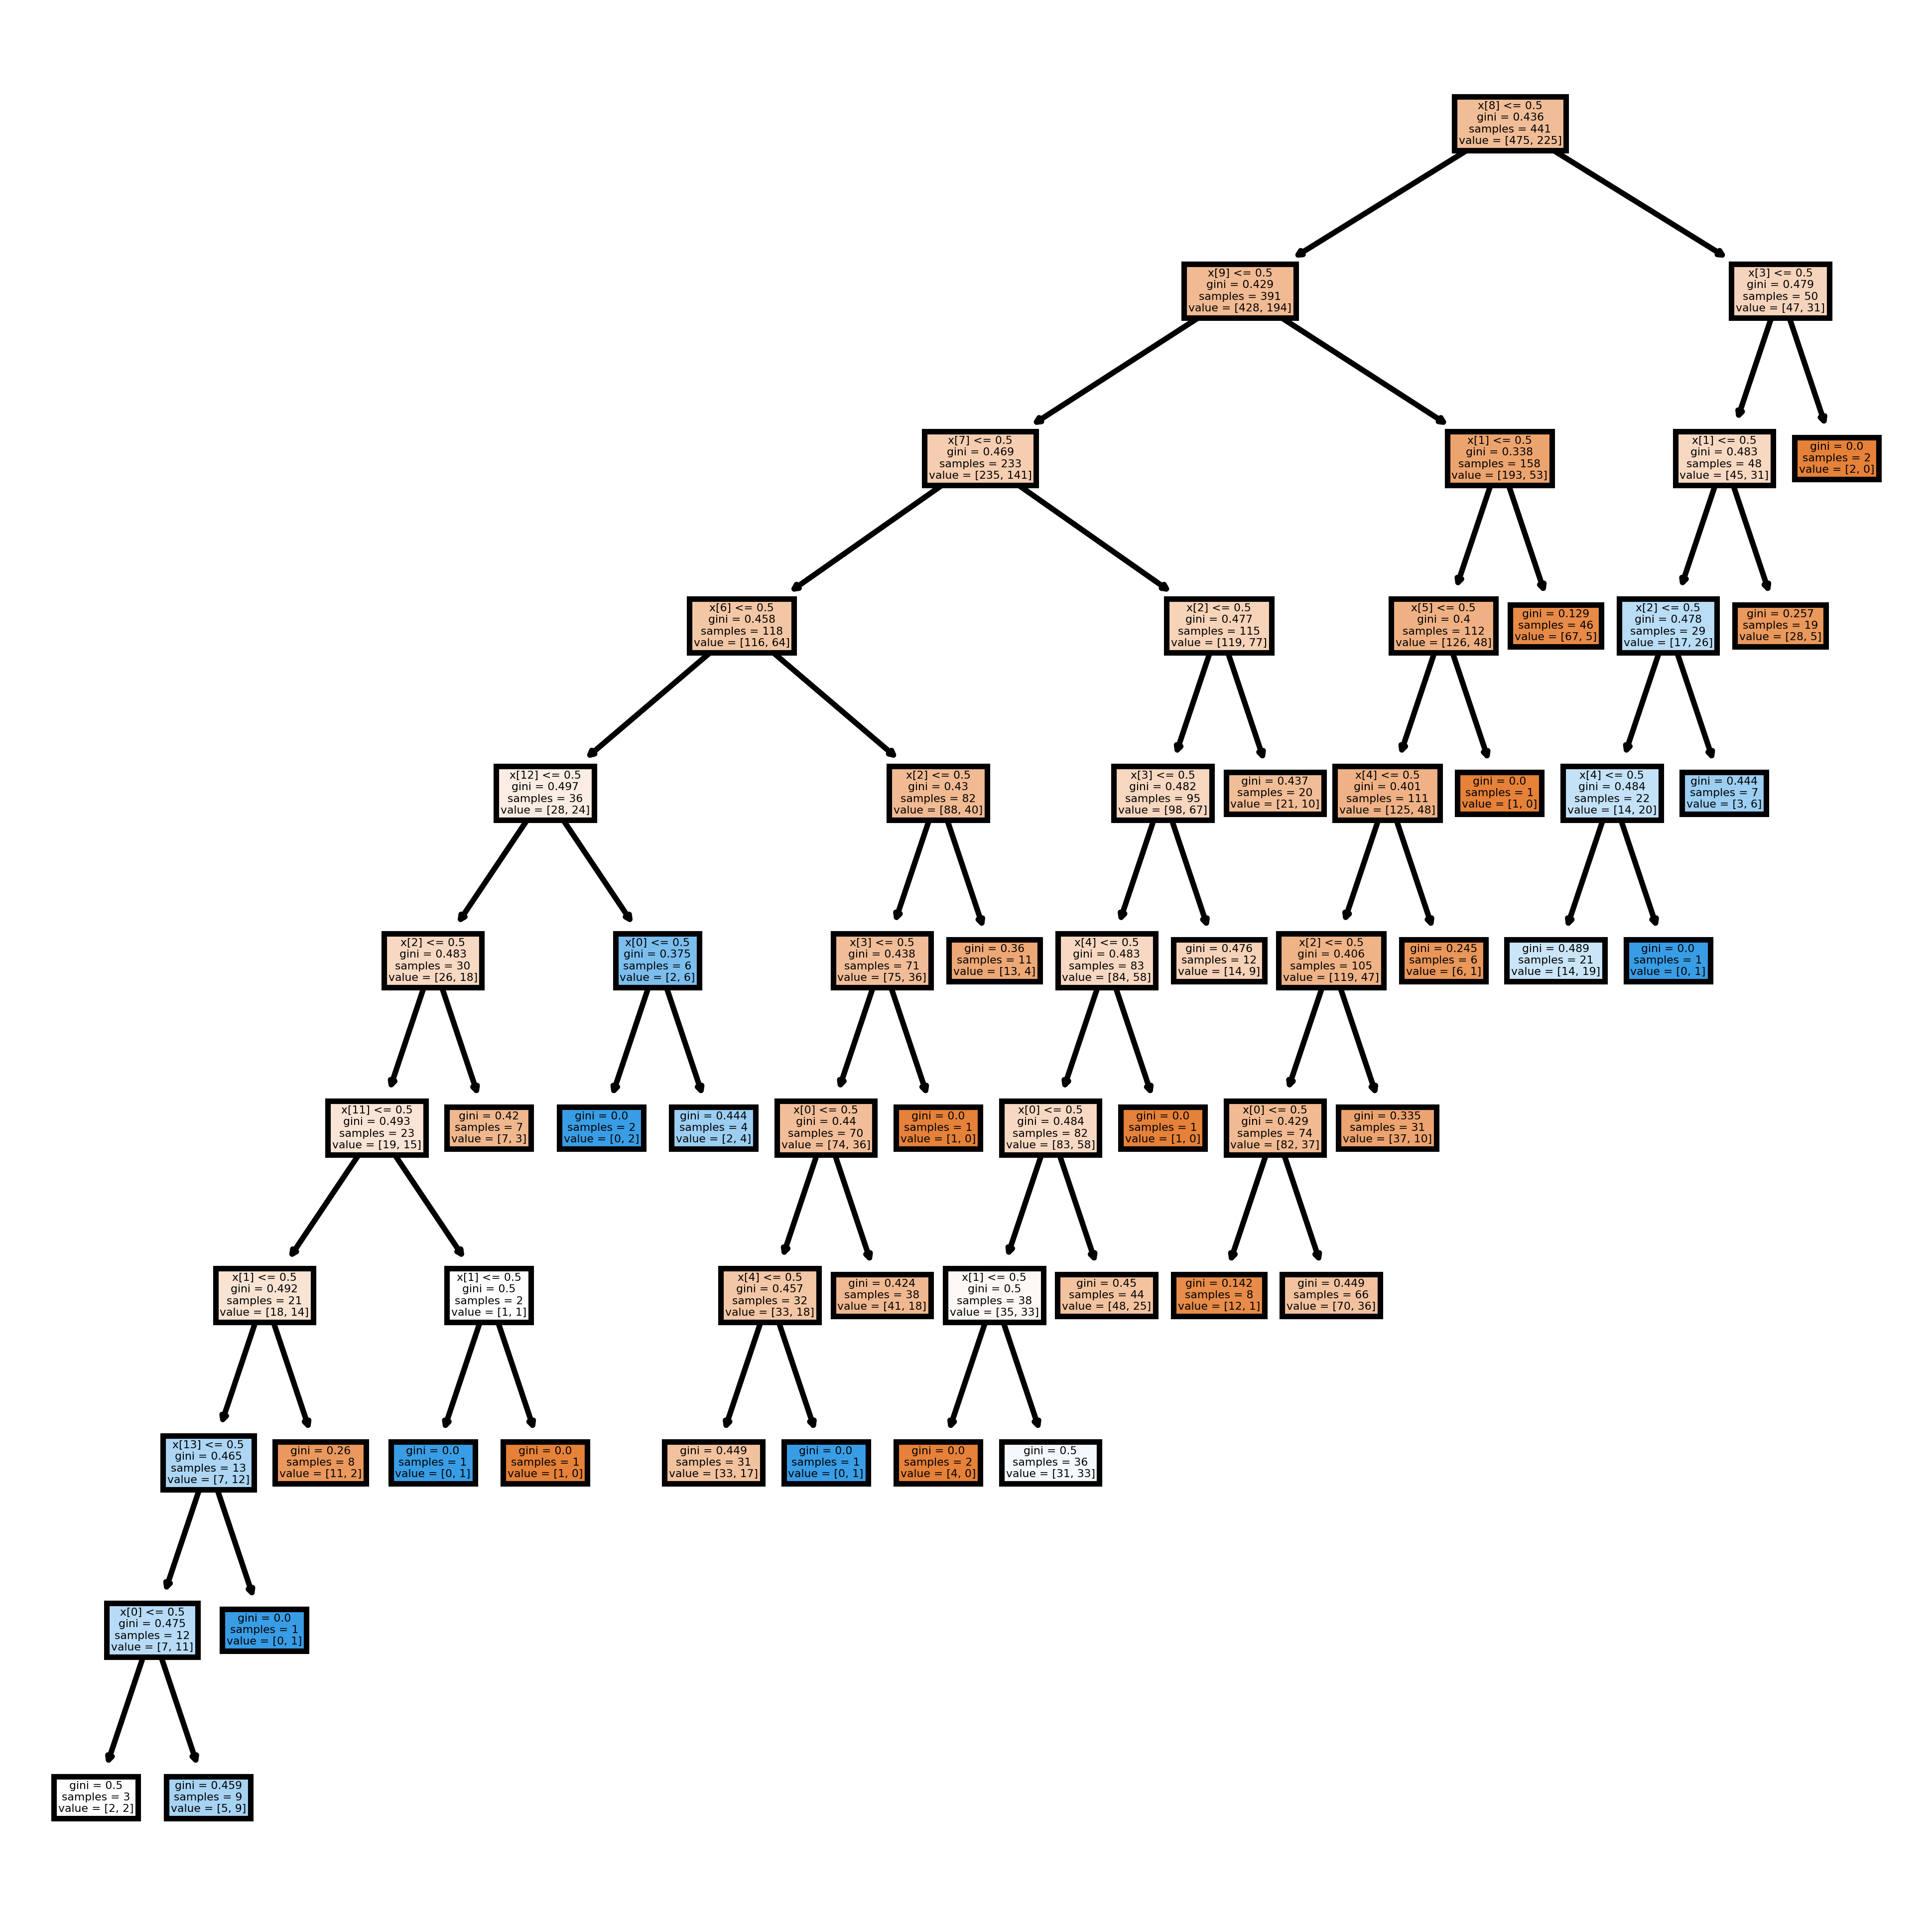

In [ ]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=800)
tree.plot_tree(model1_2['modelsRF'].estimators_[0],filled = True);
fig.savefig('rf_tree[0]')

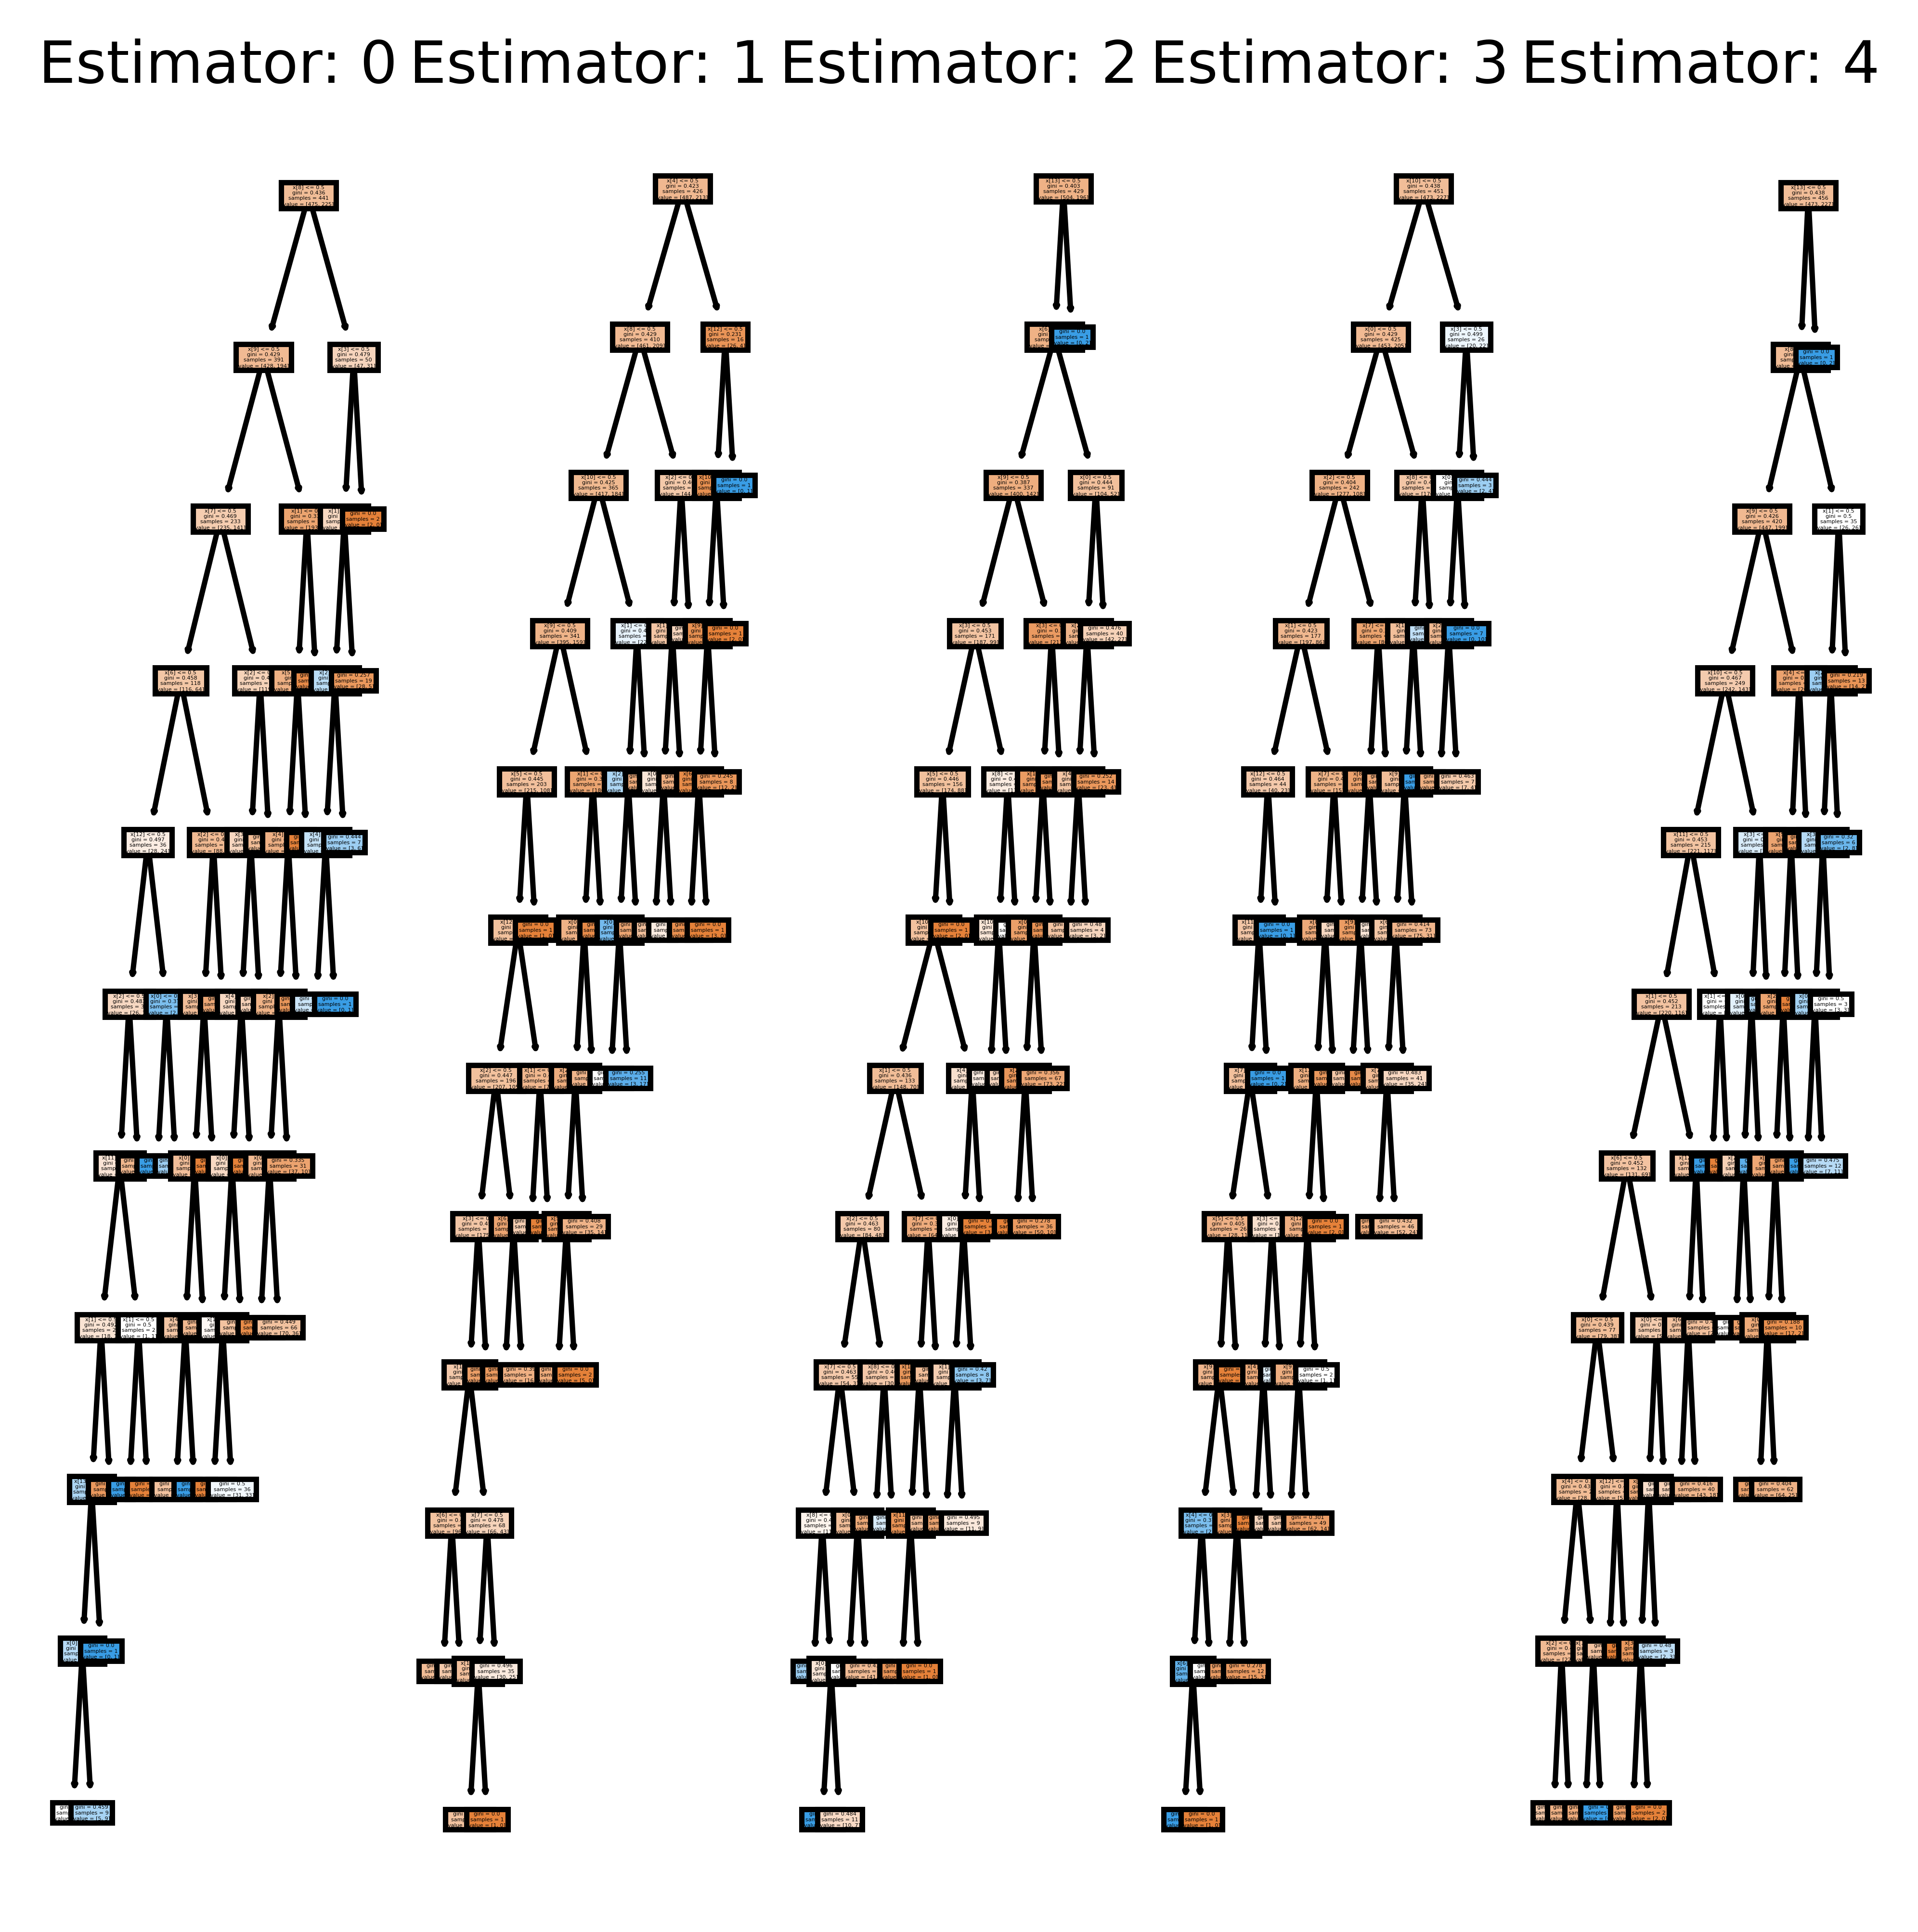

In [ ]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (6,6), dpi=800)
for index in range(0, 5):
    tree.plot_tree(model1_2['modelsRF'].estimators_[index], filled = True,ax = axes[index])
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_trees.png')

In [ ]:
pipe_rf.named_steps['scaler'].named_transformers_['transform'].get_feature_names_out(['age_bin','duration_bin'])

array(['age_bin_18-29', 'age_bin_30-39', 'age_bin_40-49', 'age_bin_50-59',
       'age_bin_60-69', 'age_bin_70+', 'duration_bin_13-21',
       'duration_bin_22-30', 'duration_bin_31-39', 'duration_bin_4-12',
       'duration_bin_40-48', 'duration_bin_49-57', 'duration_bin_58-66',
       'duration_bin_67+'], dtype=object)

### All Predictors

In [ ]:
transform_category1=ColumnTransformer([('transform', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), [i for i in df.columns if i!='credit_amount'])], remainder='passthrough')

In [ ]:
score2=[]
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
x_semua=df[[ i for i in df.columns if i!='credit_amount']]
x_train_all,x_test_all,y_train_all,y_test_all=train_test_split(x_semua,y,test_size=0.3,random_state=101)

In [ ]:
x_train_all

checking_status                  credit_history              purpose  \
290     no checking                   existing paid             business   
167        0<=X<200                   existing paid  furniture/equipment   
486     no checking                   existing paid             radio/tv   
683     no checking  critical/other existing credit             radio/tv   
876              <0                        all paid             radio/tv   
..              ...                             ...                  ...   
575     no checking  critical/other existing credit  furniture/equipment   
838              <0  critical/other existing credit             used car   
337              <0                   existing paid   domestic appliance   
523     no checking                   existing paid             used car   
863     no checking  critical/other existing credit  furniture/equipment   

       savings_status employment  installment_commitment  gender  \
290              <100     1<=X<4                     2.0    male   
167            >=1000         <1                     4.0  female   
486              <100     1<=X<4                     2.0    male   
683              <100         <1                     3.0    male   
876              <100         <1                     3.0    male   
..                ...        ...                     ...     ...   
575              <100     4<=X<7                     2.0  female   
838              <100        >=7                     4.0    male   
337  no known savings     1<=X<4                     4.0  female   
523        100<=X<500     4<=X<7                     3.0  female   
863            >=1000         <1                     4.0    male   

    other_parties  residence_since property_magnitude other_payment_plans  \
290          none              2.0        real estate                none   
167          none              1.0        real estate                none   
486          none              4.0                car                none   
683          none              3.0  no known property                none   
876  co applicant              4.0  no known property                bank   
..            ...              ...                ...                 ...   
575  co applicant              3.0                car                bank   
838          none              4.0     life insurance                none   
337          none              2.0                car                none   
523          none              4.0                car                none   
863          none              2.0        real estate              stores   

      housing  existing_credits                        job  num_dependents  \
290       own               1.0                    skilled             1.0   
167       own               1.0                    skilled             1.0   
486       own               1.0                    skilled             1.0   
683  for free               3.0                    skilled             1.0   
876  for free               1.0  high qualif/self emp/mgmt             1.0   
..        ...               ...                        ...             ...   
575       own               2.0                    skilled             1.0   
838       own               2.0                    skilled             1.0   
337      rent               1.0                    skilled             1.0   
523       own               1.0                    skilled             1.0   
863       own               2.0         unskilled resident             2.0   

    own_telephone foreign_worker age_bin duration_bin  
290           yes             no   18-29         4-12  
167          none            yes   18-29         4-12  
486           yes            yes   50-59         4-12  
683           yes            yes   40-49        22-30  
876           yes            yes   30-39        13-21  
..            ...            ...     ...          ...  
575          none   

In [ ]:
x_test_all

checking_status                  credit_history              purpose  \
545              <0              delayed previously              new car   
298     no checking                   existing paid  furniture/equipment   
109        0<=X<200                   existing paid             business   
837     no checking                   existing paid  furniture/equipment   
194        0<=X<200                   existing paid             radio/tv   
..              ...                             ...                  ...   
847     no checking                   existing paid              new car   
682     no checking              delayed previously             radio/tv   
884        0<=X<200                   existing paid  furniture/equipment   
325              <0  critical/other existing credit              new car   
482              <0                   existing paid  furniture/equipment   

    savings_status  employment  installment_commitment  gender other_parties  \
545           <100  unemployed                     4.0    male          none   
298           <100      1<=X<4                     3.0    male          none   
109    500<=X<1000         >=7                     1.0    male          none   
837           <100          <1                     1.0  female          none   
194     100<=X<500      1<=X<4                     4.0    male     guarantor   
..             ...         ...                     ...     ...           ...   
847           <100          <1                     4.0    male          none   
682           <100      1<=X<4                     4.0    male          none   
884           <100      4<=X<7                     3.0    male          none   
325           <100      4<=X<7                     1.0    male          none   
482         >=1000         >=7                     4.0  female          none   

     residence_since property_magnitude other_payment_plans   housing  \
545              2.0        real estate                none  for free   
298              4.0        real estate                none       own   
109              2.0        real estate                none       own   
837              3.0        real estate                none      rent   
194              4.0     life insurance                none      rent   
..               ...                ...                 ...       ...   
847              2.0        real estate                none       own   
682              3.0        real estate                bank       own   
884              3.0                car                none       own   
325              4.0        real estate                none       own   
482              4.0     life insurance                none      rent   

     existing_credits                 job  num_dependents own_telephone  \
545               2.0             skilled             2.0          none   
298               1.0             skilled             1.0           yes   
109               1.0             skilled             1.0           yes   
837               1.0  unskilled resident             2.0          none   
194               1.0             skilled             1.0          none   
..                ...                 ...             ...           ...   
847               1.0             skilled             1.0          none   
682               2.0             skilled             1.0          none   
884               1.0             skilled             1.0           yes   
325               2.0  unskilled resident             1.0          none   
482               2.0             skilled             1.0           yes   

    foreign_worker age_bin duration_bin  
545            yes   40-49        22-30  
298            yes   40-49        13-21  
109            yes   30-39        13-21  
837            yes   18-29         4-12  
194            yes   18-29        40-48  
..             ...     ...          ...  
847            yes   18-29        22-30  
682            y

In [ ]:
score2=[]
for i in models:
  estimator=Pipeline([('scaler',transform_category1),('models',i)])
  shuffle=StratifiedKFold(n_splits=10,random_state=101,shuffle=True)
  model_score=cross_validate(estimator,x_train_all,y_train_all,scoring='recall',cv=shuffle)
  score2.append(model_score)
score2
train_cv2=pd.DataFrame(score2)
train_cv2
list2=[]
for i in range(0,train_cv2.shape[0]):
  for j in range(0,train_cv2.shape[1]):
    list2.append(train_cv2.iloc[i,j].mean())
data2=np.array(list2).reshape(6,3)
data_hasil2=pd.DataFrame(data2).rename(columns={0:'fit_time',1:'score_time',2:'test_score'})
data_hasil2['models']=['GPC','RF','XG','GB','DT','LGBM']
data_hasil2.sort_values('test_score',ascending=False)

fit_time  score_time  test_score models
5  0.067852    0.010575    0.503810   LGBM
2  0.269252    0.011290    0.464762     XG
4  0.016934    0.007782    0.436667     DT
3  0.229525    0.008919    0.430952     GB
1  0.363502    0.028240    0.293810     RF
0  0.354255    0.030249    0.180476    GPC

In [ ]:
y_test_all

545    1
298    0
109    0
837    0
194    1
      ..
847    0
682    0
884    1
325    0
482    0
Name: class, Length: 300, dtype: int64

In [ ]:
pipe_lgbm=Pipeline([('scaler',transform_category1),('modelsLGBM',LGBM)])
model2_1=pipe_lgbm.fit(x_train_all,y_train_all)
y_pred2_1=model2_1.predict(x_test_all)
from sklearn.metrics import confusion_matrix,classification_report
LGBM_acc=accuracy_score(y_pred2_1,y_test_all)

In [ ]:
model2_1

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('transform',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['checking_status',
                                                   'credit_history', 'purpose',
                                                   'savings_status',
                                                   'employment',
                                                   'installment_commitment',
                                                   'gender', 'other_parties',
                                                   'residence_since',
                                                   'property_magnitude',
                                                   'other_payment_plans',
                                                   'housing',
                                                   'existing_credits', 'job',
                                                   'num_dependents',
                                                   'own_telephone',
                                                   'foreign_worker', 'age_bin',
                                                   'duration_bin'])])),
                ('modelsLGBM', LGBMClassifier())])

<Axes: >

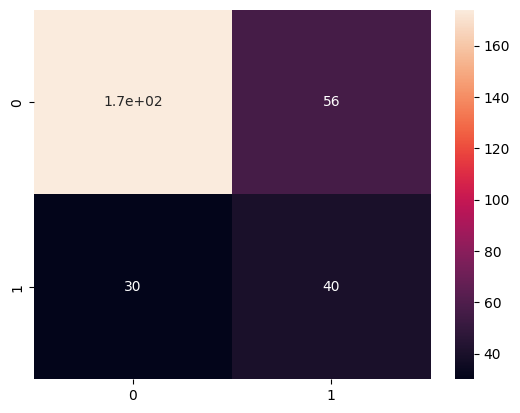

In [ ]:
sns.heatmap(confusion_matrix(y_pred2_1,y_test_all),annot=True)

In [ ]:
print(classification_report(y_pred2_1,y_test_all))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       230
           1       0.42      0.57      0.48        70

    accuracy                           0.71       300
   macro avg       0.63      0.66      0.64       300
weighted avg       0.75      0.71      0.73       300



In [ ]:
pipe_xg2=Pipeline([('scaler',transform_category1),('modelsXG',XG)])
model2_2=pipe_xg2.fit(x_train_all,y_train_all)
y_pred2_2=model2_2.predict(x_test_all)
from sklearn.metrics import confusion_matrix,classification_report
XG_acc=accuracy_score(y_pred2_2,y_test_all)

<Axes: >

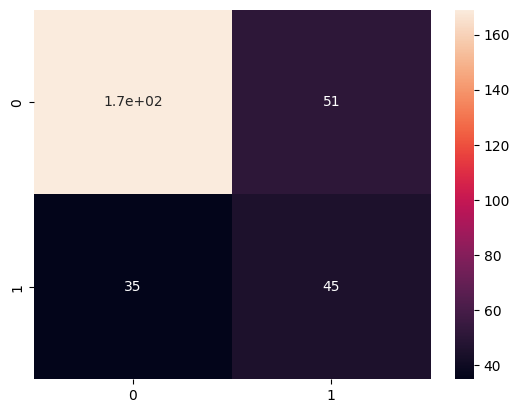

In [ ]:
sns.heatmap(confusion_matrix(y_pred2_2,y_test_all),annot=True)

In [ ]:
print(classification_report(y_pred2_2,y_test_all))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       220
           1       0.47      0.56      0.51        80

    accuracy                           0.71       300
   macro avg       0.65      0.67      0.65       300
weighted avg       0.73      0.71      0.72       300



In [ ]:
import matplotlib.pyplot as plt
features=model2_1[0].get_feature_names_out()

Text(0.5, 1.0, 'Feature Importances\n Credit Risk Customers with LGBM Algorithm')

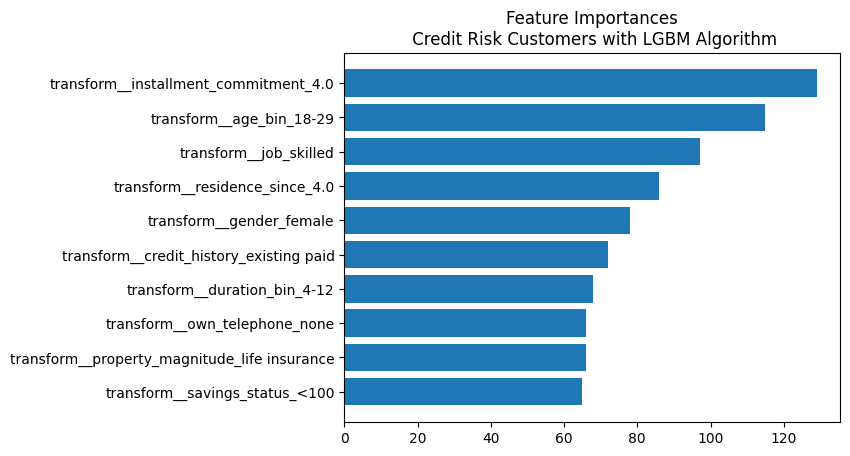

In [ ]:
importances=model2_1[1].feature_importances_
data=pd.DataFrame(data=[features,importances]).T.sort_values(1,ascending=True)
plt.barh(width=data.tail(10)[1],y=data.tail(10)[0])
plt.title('Feature Importances\n Credit Risk Customers with LGBM Algorithm')

In [ ]:
import matplotlib.pyplot as plt
features=pipe_lgbm[0].get_feature_names_out()

Text(0.5, 1.0, 'Feature Importances\n Credit Risk Customers with LGBM Algorithm')

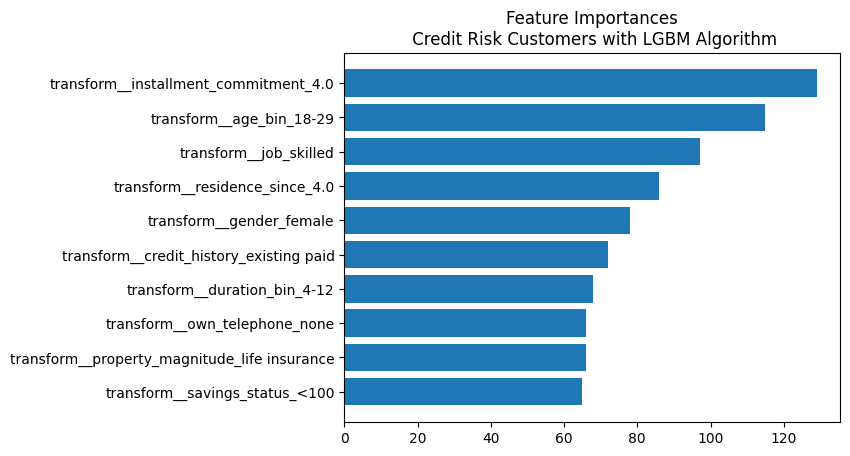

In [ ]:
importances=pipe_lgbm[-1].feature_importances_
data=pd.DataFrame(data=[features,importances]).T.sort_values(1,ascending=True)
plt.barh(width=data.tail(10)[1],y=data.tail(10)[0])
plt.title('Feature Importances\n Credit Risk Customers with LGBM Algorithm')

In [ ]:
import matplotlib.pyplot as plt
features=pipe_xg2[0].get_feature_names_out()

TypeError: ignored

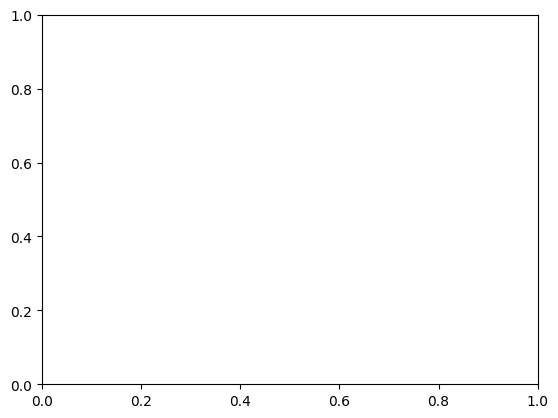

In [ ]:
importances=pipe_xg2[-1].feature_importances_
data=pd.DataFrame(data=[features,importances]).T.sort_values(1,ascending=True)
plt.barh(width=data.tail(10)[1],y=data.tail(10)[0])
plt.title('Feature Importances\n Credit Risk Customers with XGBoost Algorithm')

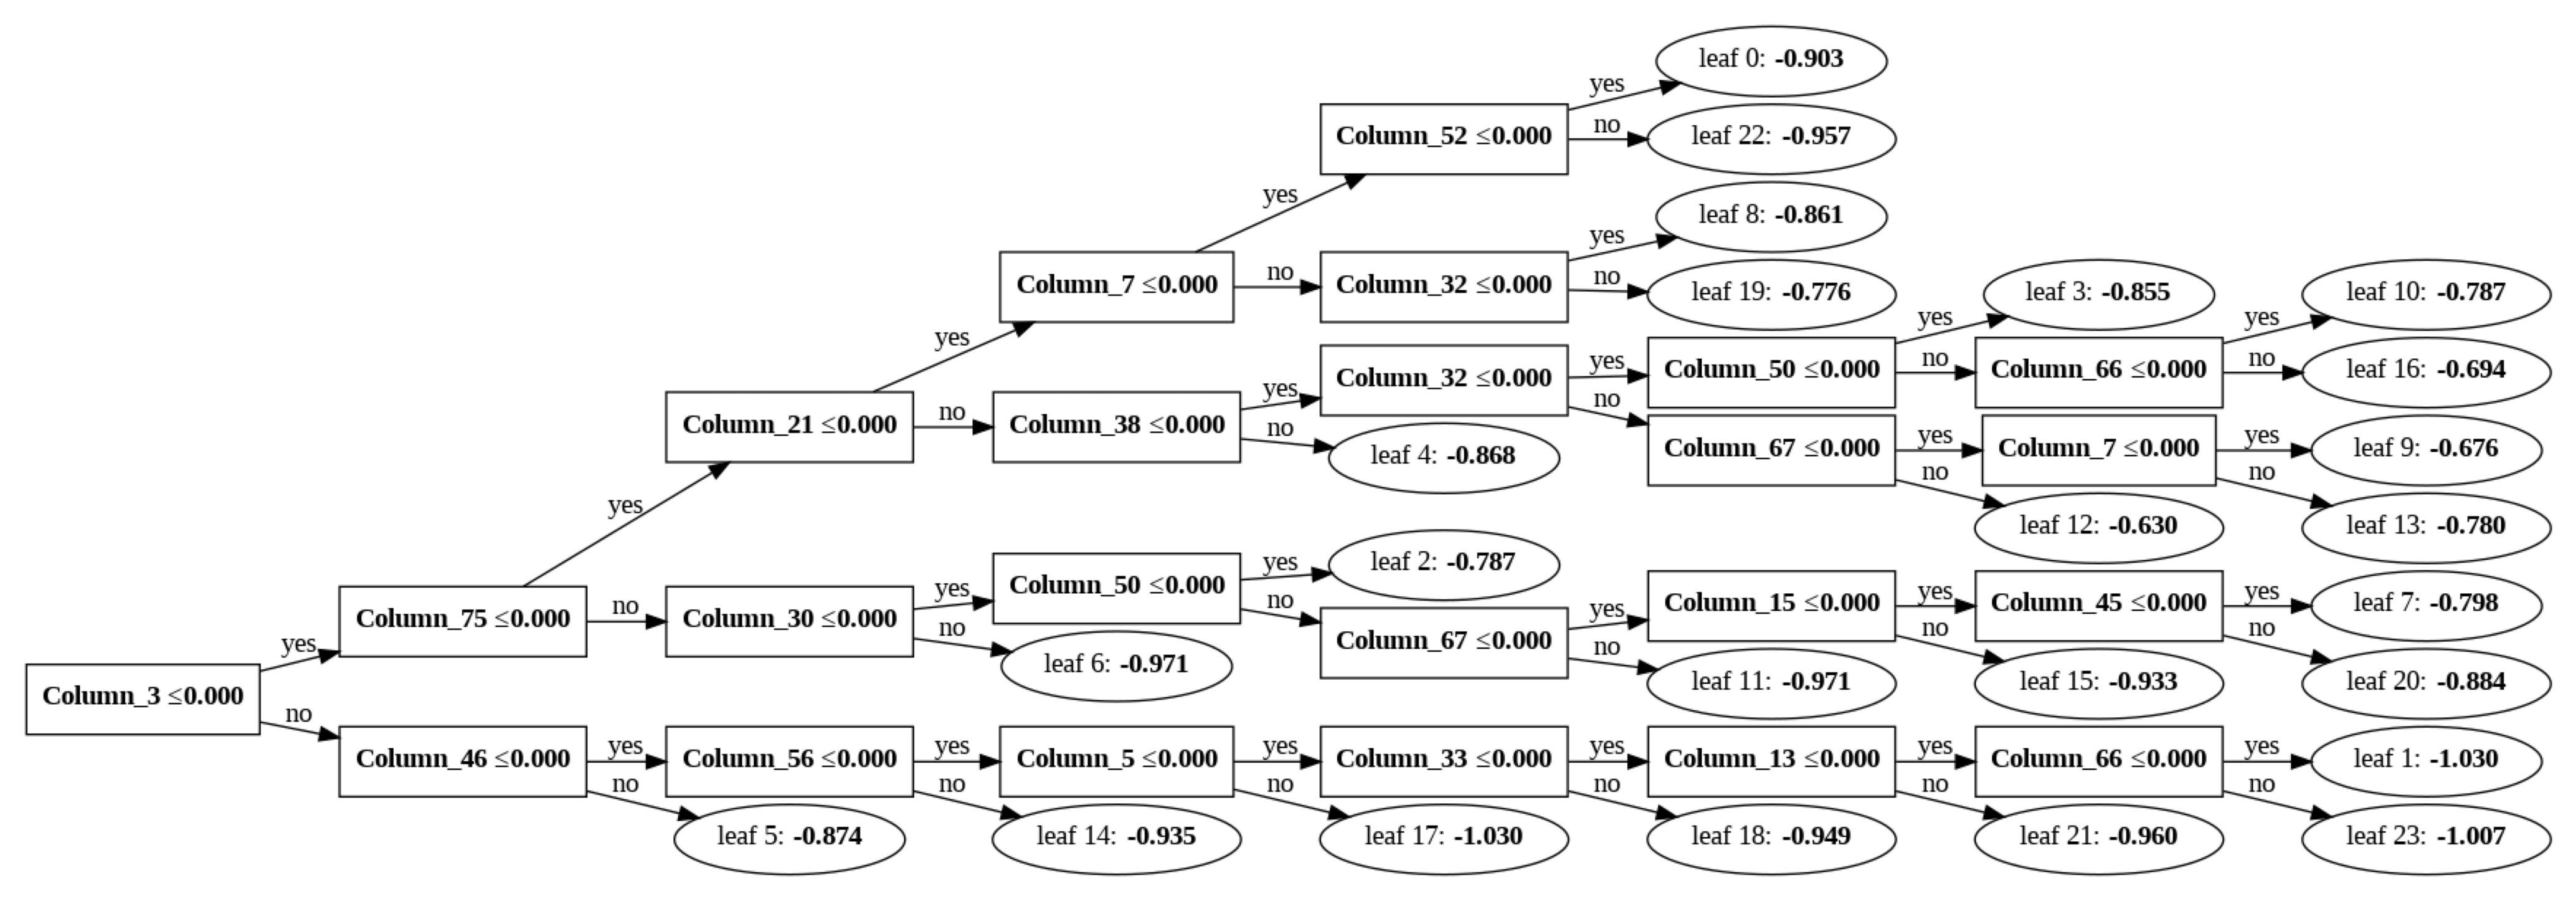

In [ ]:
import lightgbm as lgb
lgb.plot_tree(model2_1['modelsLGBM'],figsize=(20,6),tree_index=0,dpi=300)
plt.savefig('lgbm_tree')

In [ ]:
pipe_lgbm.named_steps['scaler'].named_transformers_['transform'].get_feature_names_out()

array(['checking_status_0<=X<200', 'checking_status_<0',
       'checking_status_>=200', 'checking_status_no checking',
       'credit_history_all paid',
       'credit_history_critical/other existing credit',
       'credit_history_delayed previously',
       'credit_history_existing paid',
       'credit_history_no credits/all paid', 'purpose_business',
       'purpose_domestic appliance', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_new car', 'purpose_other',
       'purpose_radio/tv', 'purpose_repairs', 'purpose_retraining',
       'purpose_used car', 'savings_status_100<=X<500',
       'savings_status_500<=X<1000', 'savings_status_<100',
       'savings_status_>=1000', 'savings_status_no known savings',
       'employment_1<=X<4', 'employment_4<=X<7', 'employment_<1',
       'employment_>=7', 'employment_unemployed',
       'installment_commitment_1.0', 'installment_commitment_2.0',
       'installment_commitment_3.0', 'installment_commitment_4.0',
       'g

## Association Rule

In [ ]:
df2=df

In [ ]:
y

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: class, Length: 1000, dtype: int64

In [ ]:
df2['class']=y

In [ ]:
df2.to_csv('credit_risk_customers_modified.csv')

In [ ]:
df2['class']=np.where(df2['class']==1,'bad','good')

In [ ]:
arule_1=pd.get_dummies(df2[['age_bin','purpose','class','duration_bin']])

In [ ]:
arule_1

age_bin_18-29  age_bin_30-39  age_bin_40-49  age_bin_50-59  \
0                0              0              0              0   
1                1              0              0              0   
2                0              0              1              0   
3                0              0              1              0   
4                0              0              0              1   
..             ...            ...            ...            ...   
995              0              1              0              0   
996              0              1              0              0   
997              0              1              0              0   
998              1              0              0              0   
999              1              0              0              0   

     age_bin_60-69  age_bin_70+  purpose_business  purpose_domestic appliance  \
0                1            0                 0                           0   
1                0            0                 0                           0   
2                0            0                 0                           0   
3                0            0                 0                           0   
4                0            0                 0                           0   
..             ...          ...               ...                         ...   
995              0            0                 0                           0   
996              0            0                 0                           0   
997              0            0                 0                           0   
998              0            0                 0                           0   
999              0            0                 0                           0   

     purpose_education  purpose_furniture/equipment  ...  class_bad  \
0                    0                            0  ...          0   
1                    0                            0  ...          1   
2                    1                            0  ...          0   
3                    0                            1  ...          0   
4                    0                            0  ...          1   
..                 ...                          ...  ...        ...   
995                  0                            1  ...          0   
996                  0                            0  ...          0   
997                  0                            0  ...          0   
998                  0                            0  ...          1   
999                  0                            0  ...          0   

     class_good  duration_bin_4-12  duration_bin_13-21  duration_bin_22-30  \
0             1                  1                   0                   0   
1             0                  0                   0                   0   
2             1                  1                   0                   0   
3             1                  0                   0                   0   
4             0                  0                   0                   1   
..          ...                ...                 ...                 ...   
995           1                  1                   0                   0   
996           1                  0                   0                   1   
997           1                  1                   0                   0   
998           0                  0                   0                   0   
999           1                  0                   0                   0   

     duration_bin_31-39  duration_bin_40-48  duration_bin_49-57  \
0                     0                   0                   0   
1                     0                   1                   0   
2                     0                   0                   0   
3                     0                   1                   0   
4                     0                   0                   0   
..                  ...            

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemsets=apriori(arule_1,min_support=0.07,use_colnames=True)
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules.head()

antecedents                    consequents  \
0  (purpose_furniture/equipment)                (age_bin_18-29)   
1                (age_bin_18-29)  (purpose_furniture/equipment)   
2                (age_bin_18-29)             (purpose_radio/tv)   
3             (purpose_radio/tv)                (age_bin_18-29)   
4                (age_bin_18-29)                    (class_bad)   

   antecedent support  consequent support  support  confidence      lift  \
0               0.181               0.411    0.094    0.519337  1.263594   
1               0.411               0.181    0.094    0.228710  1.263594   
2               0.411               0.280    0.125    0.304136  1.086201   
3               0.280               0.411    0.125    0.446429  1.086201   
4               0.411               0.300    0.148    0.360097  1.200324   

   leverage  conviction  
0  0.019609    1.225391  
1  0.019609    1.061858  
2  0.009920    1.034685  
3  0.009920    1.064000  
4  0.024700    1.093916

In [ ]:
rules.sort_values('confidence',ascending=False)

antecedents  \
43     (age_bin_30-39, duration_bin_4-12)   
54  (duration_bin_4-12, purpose_radio/tv)   
27                     (purpose_used car)   
31                    (duration_bin_4-12)   
23                     (purpose_radio/tv)   
48   (purpose_new car, duration_bin_4-12)   
13                        (age_bin_30-39)   
17                        (age_bin_40-49)   
39     (age_bin_18-29, duration_bin_4-12)   
33                   (duration_bin_13-21)   
35      (age_bin_18-29, purpose_radio/tv)   
46          (class_good, purpose_new car)   
0           (purpose_furniture/equipment)   
5                             (class_bad)   
20                      (purpose_new car)   
3                      (purpose_radio/tv)   
52         (class_good, purpose_radio/tv)   
7                    (duration_bin_13-21)   
8                    (duration_bin_22-30)   
30                           (class_good)   
24                     (purpose_radio/tv)   
38            (class_good, age_bin_18-29)   
18                      (purpose_new car)   
42            (class_good, age_bin_30-39)   
4                         (age_bin_18-29)   
15                   (duration_bin_13-21)   
56                     (purpose_radio/tv)   
50                      (purpose_new car)   
53        (class_good, duration_bin_4-12)   
12                           (class_good)   
34            (class_good, age_bin_18-29)   
10                      (purpose_new car)   
37                     (purpose_radio/tv)   
25                    (duration_bin_4-12)   
22                           (class_good)   
28                   (duration_bin_22-30)   
2                         (age_bin_18-29)   
21                    (duration_bin_4-12)   
19                            (class_bad)   
47        (class_good, duration_bin_4-12)   
41                    (duration_bin_4-12)   
57                    (duration_bin_4-12)   
14                        (age_bin_30-39)   
29                            (class_bad)   
11                        (age_bin_30-39)   
9                         (age_bin_18-29)   
45                    (duration_bin_4-12)   
6                         (age_bin_18-29)   
1                         (age_bin_18-29)   
32                           (class_good)   
51                    (duration_bin_4-12)   
16                           (class_good)   
40                           (class_good)   
55                           (class_good)   
44                           (class_good)   
36                           (class_good)   
26                           (class_good)   
49                           (class_good)   

                              consequents  antecedent support  \
43                           (class_good)               0.104   
54                           (class_good)               0.114   
27                           (class_good)               0.103   
31                           (class_good)               0.363   
23                           (class_good)               0.280   
48                           (class_good)               0.108   
13                           (class_good)               0.315   
17                           (class_good)               0.161   
39                           (class_good)               0.143   
33                           (class_good)               0.223   
35                           (class_good)               0.125   
46                    (duration_bin_4-12)               0.145   
0                         (age_bin_18-29)               0.181   
5                         (age_bin_18-29)               0.300   
20                    (duration_bin_4-12)               0.234   
3                         (age_bin_18-29)               0.280   
52                    (duration_bin_4-12)               0.218   
7                         (age_bin_18-29)               0.223   
8                         (age_bin_18-29)               0.241   
30                    (duration_bin_4-12)               0.700   
24       

In [ ]:
! pip install arules
! pip install arulesViz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.6 MB/s eta 0:00:00


In [ ]:
import arules
import arulesviz

In [ ]:
arule_1

age_bin_18-29  age_bin_30-39  age_bin_40-49  age_bin_50-59  \
0                0              0              0              0   
1                1              0              0              0   
2                0              0              1              0   
3                0              0              1              0   
4                0              0              0              1   
..             ...            ...            ...            ...   
995              0              1              0              0   
996              0              1              0              0   
997              0              1              0              0   
998              1              0              0              0   
999              1              0              0              0   

     age_bin_60-69  age_bin_70+  purpose_business  purpose_domestic appliance  \
0                1            0                 0                           0   
1                0            0                 0                           0   
2                0            0                 0                           0   
3                0            0                 0                           0   
4                0            0                 0                           0   
..             ...          ...               ...                         ...   
995              0            0                 0                           0   
996              0            0                 0                           0   
997              0            0                 0                           0   
998              0            0                 0                           0   
999              0            0                 0                           0   

     purpose_education  purpose_furniture/equipment  ...  class_bad  \
0                    0                            0  ...          0   
1                    0                            0  ...          1   
2                    1                            0  ...          0   
3                    0                            1  ...          0   
4                    0                            0  ...          1   
..                 ...                          ...  ...        ...   
995                  0                            1  ...          0   
996                  0                            0  ...          0   
997                  0                            0  ...          0   
998                  0                            0  ...          1   
999                  0                            0  ...          0   

     class_good  duration_bin_4-12  duration_bin_13-21  duration_bin_22-30  \
0             1                  1                   0                   0   
1             0                  0                   0                   0   
2             1                  1                   0                   0   
3             1                  0                   0                   0   
4             0                  0                   0                   1   
..          ...                ...                 ...                 ...   
995           1                  1                   0                   0   
996           1                  0                   0                   1   
997           1                  1                   0                   0   
998           0                  0                   0                   0   
999           1                  0                   0                   0   

     duration_bin_31-39  duration_bin_40-48  duration_bin_49-57  \
0                     0                   0                   0   
1                     0                   1                   0   
2                     0                   0                   0   
3                     0                   1                   0   
4                     0                   0                   0   
..                  ...            

In [ ]:
v=df2[['age_bin','purpose','class','duration_bin']].values.tolist()